## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]
import seaborn as sns
import scipy.stats as ss
from scipy.stats.mstats import winsorize

In [ ]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

In [ ]:
# Sweetviz library
!pip install sweetviz     # You may need to pip install sweetviz
import sweetviz as sv

     |████████████████████████████████| 15.1 MB 7.9 MB/s 


In [ ]:
# Basic Libraries
import pandas as pd
import seaborn as sns

import numpy as np
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats.mstats import winsorize
import scipy.stats as ss
import math

In [ ]:
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import Ridge, HuberRegressor, LinearRegression
from sklearn.compose import TransformedTargetRegressor

In [ ]:
# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, RobustScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 43 kB/s 


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import skew, norm, probplot
import time
from sklearn.preprocessing import OneHotEncoder, RobustScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import Ridge, HuberRegressor, LinearRegression
from sklearn.svm import SVR
from sklearn.cluster import KMeans
import catboost as cb
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from scipy.stats import skew, norm, probplot

In [ ]:
# Keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
from scipy import stats
from scipy.stats import norm, skew

## Reading the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_ = "drive/My Drive/Hackathon/Trailblazers/Train.csv" 
df=pd.read_csv(file_) 

Mounted at /content/drive


In [ ]:
# Load the test data
file_ = "drive/My Drive/Hackathon/Trailblazers/Test.csv" 
test = pd.read_csv(file_)
# Add any extra features just as we did for train
test['Household_Size'] = test['total_individuals']/test['total_households']

In [ ]:
# Average household size - might contain some useful information
df['Household_Size'] = df['total_individuals']/df['total_households']

## EDA

In [ ]:
df.head()

ward  total_households  total_individuals     target     dw_00  \
0  41601001: Ward 1        1674.45058         5888.20750  16.773757  0.933841   
1  41601002: Ward 2        1736.99230         6735.33812  21.496661  0.696940   
2  41601003: Ward 3        2403.57591         7273.04995  10.931425  0.810545   
3  41601004: Ward 4        1740.78737         5734.49046  23.119257  0.659914   
4  41601005: Ward 5        1730.51451         6657.23835  13.652252  0.950575   

      dw_01     dw_02     dw_03     dw_04     dw_05     dw_06     dw_07  \
0  0.000846  0.005490  0.000676  0.000000  0.001372  0.005750  0.031466   
1  0.001253  0.004402  0.000000  0.002301  0.001323  0.007575  0.123547   
2  0.004517  0.008891  0.003986  0.007735  0.000956  0.006686  0.022632   
3  0.000000  0.006129  0.000000  0.000813  0.037245  0.005255  0.068909   
4  0.000655  0.001473  0.000598  0.006999  0.000818  0.004985  0.009150   

      dw_08     dw_09     dw_10     dw_11  dw_12  dw_13    psa_00    psa_01  \
0  0.008080  0.002823  0.001431  0.008224      0      0  0.260191  0.607898   
1  0.151910  0.001486  0.001253  0.008010      0      0  0.290228  0.549788   
2  0.129902  0.000000  0.000000  0.004150      0      0  0.186435  0.677005   
3  0.218786  0.000000  0.000000  0.002947      0      0  0.281229  0.593281   
4  0.015382  0.008693  0.000000  0.000673      0      0  0.196687  0.517578   

     psa_02    psa_03    psa_04    stv_00    stv_01    car_00    car_01  \
0  0.000188  0.010018  0.121705  0.283468  0.716532  0.273727  0.726273   
1  0.000000  0.021336  0.138647  0.103641  0.896359  0.144638  0.855362   
2  0.000489  0.021315  0.114757  0.165772  0.834228  0.272220  0.727780   
3  0.000579  0.007249  0.117663  0.087768  0.912232  0.127875  0.872125   
4  0.000989  0.005148  0.279598  0.345975  0.654025  0.404507  0.595493   

     lln_00    lln_01    lan_00    lan_01    lan_02    lan_03    lan_04  \
0  0.118825  0.881175  0.832913  0.012336  0.001923  0.050939  0.000000   
1  0.066903  0.933097  0.879655  0.008445  0.000328  0.011249  0.000842   
2  0.100009  0.899991  0.565546  0.015991  0.001566  0.111270  0.004795   
3  0.029155  0.970845  0.743812  0.006530  0.001188  0.086423  0.006735   
4  0.133552  0.866448  0.422623  0.014352  0.000842  0.121869  0.007027   

     lan_05    lan_06    lan_07    lan_08    lan_09    lan_10    lan_11  \
0  0.000564  0.076088  0.006371  0.003663  0.000375  0.000372  0.004943   
1  0.001759  0.032431  0.030844  0.001646  0.001308  0.000994  0.000000   
2  0.002552  0.148083  0.139687  0.003165  0.000165  0.000779  0.001692   
3  0.002308  0.103244  0.038284  0.003080  0.000582  0.000000  0.000197   
4  0.002613  0.147363  0.081706  0.003044  0.000169  0.000643  0.001201   

     lan_12  lan_13    lan_14     pg_00     pg_01     pg_02     pg_03  \
0  0.002719       0  0.006793  0.357455  0.563166  0.004260  0.072996   
1  0.002439       0  0.028061  0.698428  0.278006  0.003695  0.015835   
2  0.002509       0  0.002200  0.672452  0.154225  0.002181  0.167494   
3  0.007442       0  0.000174  0.728014  0.263831  0.001806  0.000956   
4  0.004276       0  0.192272  0.753491  0.129654  0.004523  0.106953   

      pg_04    lgt_00     pw_00     pw_01     pw_02     pw_03     pw_04  \
0  0.002123  0.919424  0.742692  0.214027  0.019968  0.002848  0.007537   
1  0.004036  0.959259  0.309294  0.576844  0.018946  0.014566  0.057127   
2  0.003649  0.826164  0.323393  0.483376  0.083010  0.057560  0.010358   
3  0.005393  0.986151  0.677437  0.314194  0.002689  0.000000  0.000669   
4  0.005380  0.957376  0.771106  0.194743  0.009699  0.004859  0.001290   

      pw_05     pw_06  pw_07  pw_08 ADM4_PCODE        lat        lon  \
0  0.000000  0.012928      0      0  ZA4161001 -29.682270  24.734743   
1  0.019092  0.004131      0      0  ZA4161002 -29.119311  24.757737   
2  0.001421  0.040881      0      0  ZA4161003 -29.142276  25.094093   
3  0.000000  0.005011      0      0  ZA4161004 -29.372052  24.942867   

In [ ]:
test.head()

ward  total_households  total_individuals     dw_00     dw_01  \
0  21001001: Ward 1        2504.95194         8745.15151  0.947257  0.000873   
1  21001002: Ward 2        2080.27718         7258.11764  0.844993  0.000481   
2  21001003: Ward 3        1106.62639         5919.13170  0.651380  0.007937   
3  21001004: Ward 4        2175.56096        10280.57452  0.410837  0.002468   
4  21001005: Ward 5        1270.83883         6018.34202  0.942851  0.002638   

      dw_02     dw_03     dw_04     dw_05     dw_06     dw_07     dw_08  \
0  0.002021  0.000000  0.000000  0.030116  0.000452  0.013018  0.003516   
1  0.043629  0.004714  0.012323  0.012300  0.022132  0.022412  0.016969   
2  0.007113  0.000000  0.001977  0.259711  0.006505  0.044153  0.013530   
3  0.011511  0.000485  0.000000  0.449604  0.009256  0.101963  0.001516   
4  0.000821  0.000000  0.000891  0.000787  0.000830  0.027930  0.001617   

      dw_09     dw_10     dw_11  dw_12  dw_13    psa_00    psa_01    psa_02  \
0  0.000000  0.000668  0.002078    0.0    0.0  0.246694  0.615326  0.000000   
1  0.006702  0.006492  0.006853    0.0    0.0  0.193484  0.532209  0.000936   
2  0.000000  0.000000  0.007695    0.0    0.0  0.295614  0.499440  0.011465   
3  0.009203  0.000000  0.003157    0.0    0.0  0.265445  0.519198  0.000000   
4  0.017343  0.000000  0.004291    0.0    0.0  0.285008  0.552023  0.000187   

     psa_03    psa_04    stv_00    stv_01    car_00    car_01    lln_00  \
0  0.016724  0.121257  0.155406  0.844594  0.216589  0.783411  0.173569   
1  0.052571  0.220800  0.406129  0.593871  0.498555  0.501445  0.366732   
2  0.078808  0.114673  0.237233  0.762767  0.190044  0.809956  0.090176   
3  0.014156  0.201201  0.343086  0.656914  0.348310  0.651690  0.248744   
4  0.053495  0.109287  0.255566  0.744434  0.182219  0.817781  0.137765   

     lln_01    lan_00    lan_01    lan_02    lan_03    lan_04    lan_05  \
0  0.826431  0.817552  0.022885  0.000643  0.125655  0.000400  0.000125   
1  0.633268  0.434771  0.106254  0.000439  0.289230  0.001222  0.001483   
2  0.909824  0.953113  0.015398  0.000380  0.017653  0.000766  0.000190   
3  0.751256  0.852038  0.020889  0.000985  0.018133  0.000219  0.000552   
4  0.862235  0.965567  0.011856  0.000374  0.010614  0.001126  0.000000   

     lan_06    lan_07    lan_08    lan_09    lan_10  lan_11    lan_12  lan_13  \
0  0.002761  0.006069  0.000384  0.000131  0.000259     0.0  0.004612     0.0   
1  0.002284  0.003142  0.001063  0.000162  0.000000     0.0  0.005779     0.0   
2  0.002090  0.001140  0.003230  0.002241  0.000755     0.0  0.003043     0.0   
3  0.000865  0.005020  0.000766  0.000000  0.000109     0.0  0.001208     0.0   
4  0.001869  0.004672  0.000747  0.000000  0.000747     0.0  0.002429     0.0   

     lan_14     pg_00     pg_01     pg_02     pg_03     pg_04    lgt_00  \
0  0.018525  0.173136  0.736099  0.003712  0.083467  0.003586  0.921001   
1  0.154172  0.471349  0.191902  0.002854  0.324584  0.009311  0.955494   
2  0.000000  0.079592  0.914919  0.001520  0.000549  0.003420  0.975955   
3  0.099216  0.102274  0.832795  0.006965  0.054769  0.003197  0.965817   
4  0.000000  0.033536  0.956602  0.007059  0.000000  0.002803  0.951707   

      pw_00     pw_01     pw_02     pw_03     pw_04  pw_05     pw_06  pw_07  \
0  0.551691  0.427445  0.012457  0.001757  0.000000    0.0  0.006649    0.0   
1  0.759594  0.227192  0.009606  0.000691  0.000000    0.0  0.002916    0.0   
2  0.704033  0.291719  0.001996  0.002253  0.000000    0.0  0.000000    0.0   
3  0.556172  0.439729  0.002060  0.000000  0.000661    0.0  0.001379    0.0   
4  0.444380  0.553173  0.000787  0.000000  0.000000    0.0  0.001660    0.0   

   pw_08 ADM4_PCODE        lat        lon        NL  Household_Size  
0    0.0  ZA2101001 -32.637758  23.848688  0.000000        3.491145  
1    0.0  ZA2101002 -31.990536  24.555818  0.000000        3.489015  
2    0.0  ZA2101003 -32.283595  24.563940  8.269556        5.348808  
3    0.0  ZA2

In [ ]:
file_ = "drive/My Drive/Hackathon/Trailblazers/variable_descriptions.csv" 
var_desc=pd.read_csv(file_) 
pd.set_option('display.max_colwidth', 200) 
var_desc

Column  \
0        dw_00   
1        dw_01   
2        dw_02   
3        dw_03   
4        dw_04   
5        dw_05   
6        dw_06   
7        dw_07   
8        dw_08   
9        dw_09   
10       dw_10   
11       dw_11   
12       dw_12   
13       dw_13   
14      psa_00   
15      psa_01   
16      psa_02   
17      psa_03   
18      psa_04   
19      stv_00   
20      stv_01   
21      car_00   
22      car_01   
23      lln_00   
24      lln_01   
25      lan_00   
26      lan_01   
27      lan_02   
28      lan_03   
29      lan_04   
30      lan_05   
31      lan_06   
32      lan_07   
33      lan_08   
34      lan_09   
35      lan_10   
36      lan_11   
37      lan_12   
38      lan_13   
39      lan_14   
40       pg_00   
41       pg_01   
42       pg_02   
43       pg_03   
44       pg_04   
45      lgt_00   
46       pw_00   
47       pw_01   
48       pw_02   
49       pw_03   
50       pw_04   
51       pw_05   
52       pw_06   
53       pw_07   
54       pw_08   
55  ADM4_PCODE   
56         lat   
57         lon   
58          NL   
59      target   

                                                                                                                                    Description  \
0                             Percentage of dwellings of type: House or brick/concrete block structure on a separate stand or yard or on a farm   
1                                             Percentage of dwellings of type: Traditional dwelling/hut/structure made of traditional materials   
2                                                                        Percentage of dwellings of type: Flat or apartment in a block of flats   
3                                                                                     Percentage of dwellings of type: Cluster house in complex   
4                                                                 Percentage of dwellings of type: Townhouse (semi-detached house in a complex)   
5                                                                                          Percentage of dwellings of type: Semi-detached house   
6                                                                                  Percentage of dwellings of type: House/flat/room in backyard   
7                                                                                     Percentage of dwellings of type: Informal dwelling (shack   
8                                                                                     Percentage of dwellings of type: Informal dwelling (shack   
9                                  Percentage of dwellings of type: Room/flatlet on a property or larger dwelling/servants quarters/granny flat   
10                                                                                                Percentage of dwellings of type: Caravan/tent   
11                                                                                                       Percentage of dwellings of type: Other   
12                                                                                                 Percentage of dwellings of type: Unspecified   
13                                                                                              Percentage of dwellings of type: Not applicable   
14                                                                                        Percentage listing present school attendance as:  Yes   
15                                                                                         Percentage listing present school attendance as:  No   
16                                                                                Percentage listing present school attendance as:  Do not know   
17                                                                                Percentage listing present school attendance as:  Unspecified   
18                                                                             Percentage listing present school att

In [ ]:
# Strong +ve correlations
df.corr()['target'].sort_values(ascending=False).head(10)

target    1.000000
psa_00    0.782472
car_01    0.702831
stv_01    0.664181
lln_01    0.637835
pg_00     0.613346
pw_06     0.470676
dw_01     0.458206
pw_02     0.442441
pw_03     0.440941
Name: target, dtype: float64

In [ ]:
# And negative correlations
df.corr()['target'].sort_values().head(10)

pw_00    -0.754536
psa_01   -0.707506
car_00   -0.702831
stv_00   -0.664181
lln_00   -0.637835
pg_03    -0.583908
NL       -0.514398
lan_00   -0.507942
lan_01   -0.438704
dw_04    -0.385533
Name: target, dtype: float64

In [ ]:
# Shape of df
print("Shape", df.shape)

# Check data types
print(df.info())

Shape (2822, 64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 64 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ward               2822 non-null   object 
 1   total_households   2822 non-null   float64
 2   total_individuals  2822 non-null   float64
 3   target             2822 non-null   float64
 4   dw_00              2822 non-null   float64
 5   dw_01              2822 non-null   float64
 6   dw_02              2822 non-null   float64
 7   dw_03              2822 non-null   float64
 8   dw_04              2822 non-null   float64
 9   dw_05              2822 non-null   float64
 10  dw_06              2822 non-null   float64
 11  dw_07              2822 non-null   float64
 12  dw_08              2822 non-null   float64
 13  dw_09              2822 non-null   float64
 14  dw_10              2822 non-null   float64
 15  dw_11              2822 non-null   float64
 16  dw_12  

In [ ]:
# Describe Dataset 
print("\n DESCRIBE\n",df.describe())


 DESCRIBE
        total_households  total_individuals       target        dw_00  \
count       2822.000000        2822.000000  2822.000000  2822.000000   
mean        3665.281214       12869.130053    24.507554     0.712196   
std         3266.364522        9696.690518    10.294387     0.214035   
min            1.000000         402.000000     0.000000     0.000000   
25%         1778.858235        7071.205695    16.751556     0.594212   
50%         2398.249935        9366.989680    24.156670     0.766841   
75%         3987.080563       14241.233015    32.226553     0.881708   
max        39684.942130       91716.746370    55.528423     0.994962   

             dw_01        dw_02        dw_03        dw_04        dw_05  \
count  2822.000000  2822.000000  2822.000000  2822.000000  2822.000000   
mean      0.092616     0.032043     0.006057     0.008665     0.006289   
std       0.182852     0.080253     0.019374     0.030697     0.024606   
min       0.000000     0.000000     0.00000

In [ ]:
# Describe Dataset 
print("\n DESCRIBE - Test\n",test.describe())


 DESCRIBE - Test
        total_households  total_individuals        dw_00        dw_01  \
count       1013.000000        1013.000000  1013.000000  1013.000000   
mean        3126.764779       11671.898368     0.535071     0.247397   
std         2766.674568        9152.794041     0.282139     0.322355   
min          106.083320         359.881550     0.005075     0.000000   
25%         1668.381650        6638.455370     0.291854     0.003169   
50%         2068.755670        8255.902170     0.582595     0.014361   
75%         3159.075650       11899.225710     0.789347     0.531209   
max        20351.039670       64511.520420     0.982412     0.985465   

             dw_02        dw_03        dw_04        dw_05        dw_06  \
count  1013.000000  1013.000000  1013.000000  1013.000000  1013.000000   
mean      0.047997     0.004110     0.005370     0.027433     0.027838   
std       0.081129     0.009825     0.015581     0.069494     0.042059   
min       0.000000     0.000000     

In [ ]:
# Check Skewness
print("\n SKEWNESS\n",df.skew())


 SKEWNESS
 total_households      2.715798
total_individuals     2.164591
target                0.109293
dw_00                -1.027741
dw_01                 2.537747
                       ...    
pw_08                 0.000000
lat                  -0.024309
lon                  -1.256801
NL                    1.149866
Household_Size       53.112685
Length: 62, dtype: float64


In [ ]:
# Check Skewness
print("\n SKEWNESS - Test\n",test.skew())


 SKEWNESS - Test
 total_households      2.495271
total_individuals     2.294269
dw_00                -0.242112
dw_01                 0.870867
dw_02                 4.346399
                       ...    
pw_08                 0.000000
lat                   0.332779
lon                  -0.422608
NL                    1.415537
Household_Size       10.215563
Length: 61, dtype: float64


In [ ]:
# Check kurtosis
print("\n kurtosis\n",df.kurtosis())


 kurtosis
 total_households       11.665419
total_individuals       5.843852
target                 -0.698781
dw_00                   0.430059
dw_01                   5.765620
                        ...     
pw_08                   0.000000
lat                    -0.740603
lon                     2.770354
NL                      0.067994
Household_Size       2821.304468
Length: 62, dtype: float64


In [ ]:
# Check kurtosis
print("\n kurtosis - test\n",test.kurtosis())


 kurtosis - test
 total_households       6.884912
total_individuals      5.395429
dw_00                 -1.268521
dw_01                 -0.889832
dw_02                 25.544776
                        ...    
pw_08                  0.000000
lat                   -1.304420
lon                   -1.485683
NL                     0.729205
Household_Size       164.680344
Length: 61, dtype: float64


CORRELATION MATRIX
                    total_households  total_individuals    target     dw_00  \
total_households           1.000000           0.959244 -0.374833 -0.226119   
total_individuals          0.959244           1.000000 -0.293827 -0.200350   
target                    -0.374833          -0.293827  1.000000  0.018461   
dw_00                     -0.226119          -0.200350  0.018461  1.000000   
dw_01                     -0.231304          -0.161183  0.458206 -0.614702   
...                             ...                ...       ...       ...   
pw_08                           NaN                NaN       NaN       NaN   
lat                        0.063018           0.039653  0.120381  0.348089   
lon                        0.032249           0.104198  0.347088 -0.152692   
NL                         0.708701           0.684853 -0.514398 -0.133895   
Household_Size            -0.025501          -0.019814 -0.039266 -0.063736   

                      dw_01     dw_02     d

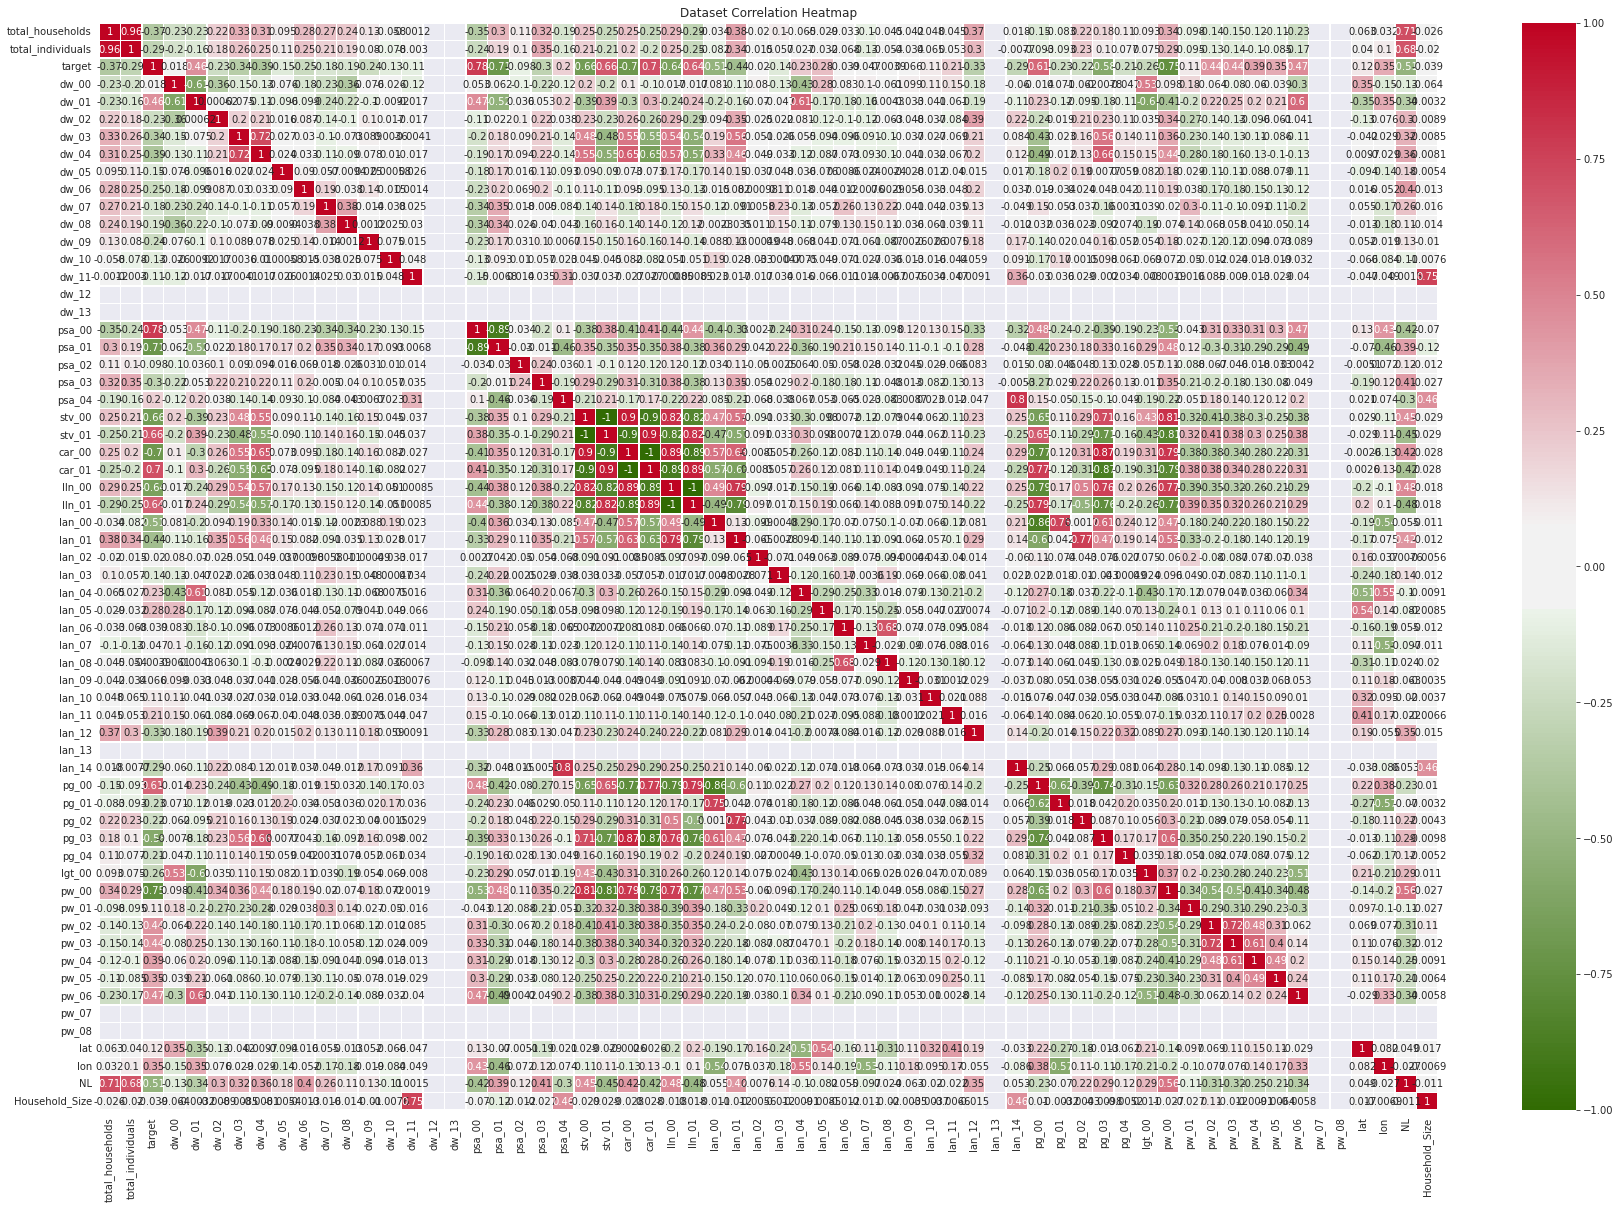



COVARIANCE MATRIX
                    total_households  total_individuals        target  \
total_households       1.066914e+07       3.038206e+07 -12603.833040   
total_individuals      3.038206e+07       9.402581e+07 -29330.296744   
target                -1.260383e+04      -2.933030e+04    105.974412   
dw_00                 -1.580834e+02      -4.158120e+02      0.040677   
dw_01                 -1.381493e+02      -2.857868e+02      0.862506   
...                             ...                ...           ...   
pw_08                  0.000000e+00       0.000000e+00      0.000000   
lat                    4.160612e+02       7.771929e+02      2.504871   
lon                    2.500523e+02       2.398431e+03      8.481751   
NL                     4.388683e+04       1.259006e+05   -100.393771   
Household_Size        -6.057776e+03      -1.397313e+04    -29.397885   

                        dw_00       dw_01       dw_02      dw_03      dw_04  \
total_households  -158.083403 -138.

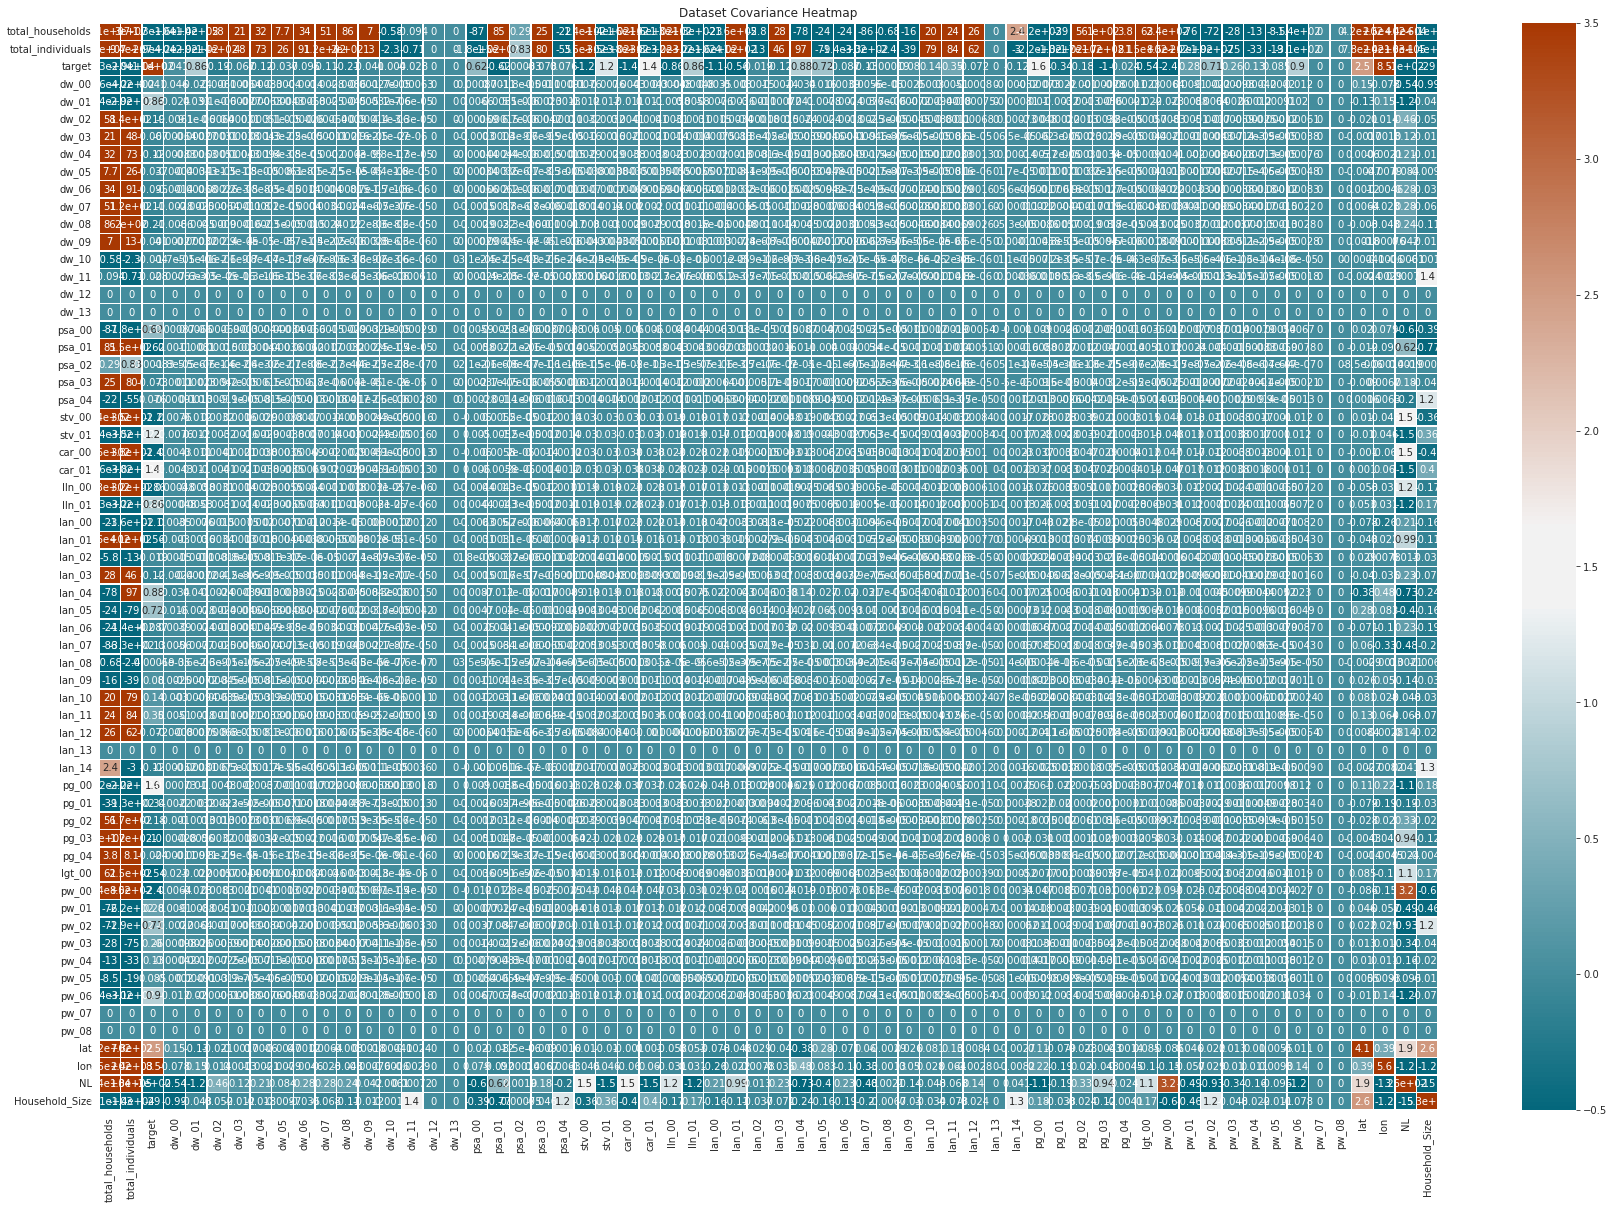

In [ ]:
# Multivariate numerical descriptive statistics

#Correlation Matrix
print("CORRELATION MATRIX\n",df.corr())
print("\n\n")

#Correlation Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (30,20))
cmap = sns.diverging_palette(120, 10, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap((df).corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Dataset Correlation Heatmap")
plt.show()

# Covariance Matrix
print("\n\nCOVARIANCE MATRIX\n",df.cov())
print("\n\n")

#Covariance Matrix as a Heatmap

sns.set_style('darkgrid')
plt.figure(figsize = (30,20))
cmap = sns.diverging_palette(220, 20, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap((df).cov(), vmin = -0.5, vmax = 3.5, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Dataset Covariance Heatmap")
plt.show()

In [ ]:
print('\n Duplicates\n',df.duplicated().sum())


 Duplicates
 0


In [ ]:
# Count total NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 ward                 0
total_households     0
total_individuals    0
target               0
dw_00                0
                    ..
ADM4_PCODE           0
lat                  0
lon                  0
NL                   0
Household_Size       0
Length: 64, dtype: int64


In [ ]:
df.value_counts(df['ward'])

ward
30601001: Ward 1     1
79700086: Ward 86    1
79800097: Ward 97    1
79800098: Ward 98    1
79800099: Ward 99    1
                    ..
52804005: Ward 5     1
52804006: Ward 6     1
52804007: Ward 7     1
52804008: Ward 8     1
94703031: Ward 31    1
Length: 2822, dtype: int64

In [ ]:
df = df.drop(['ward', 'ADM4_PCODE'], axis = 1)
test = test.drop(['ward', 'ADM4_PCODE'], axis = 1)

In [ ]:
y = df['target']
df = df.drop(['target'],axis=1)


 mu = 24.51 and sigma = 10.29



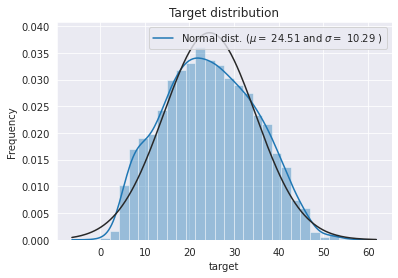

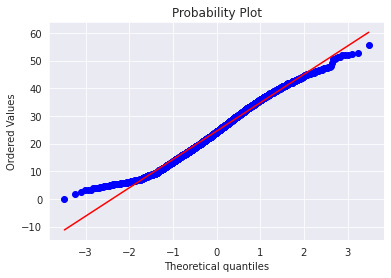

In [ ]:
# Distribution plot
sns.distplot(y , fit=norm);

(mu, sigma) = norm.fit(y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Target distribution')

# QQ-plot
fig = plt.figure()
res = probplot(y, plot=plt)
plt.show()

## Feature Transformation - Skewness

In [ ]:
skewed = df.apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.5]
skewed = skewed.index

df[skewed] = np.log1p(df[skewed])
test[skewed] = np.log1p(test[skewed])

## Feature Scaling

In [ ]:
for col in df[df.columns]:
      scaler = RobustScaler()
      df[col] = scaler.fit_transform(df[[col]])
      test[col] = scaler.transform(test[[col]])

## Feature Selection

In [ ]:
full = pd.merge(left = df, right = y , left_index= True, right_index = True)
mi = mutual_info_regression(X = full.drop('target', axis = 1), y = full['target'])
mi_df = pd.DataFrame(list(zip(full.columns,mi)), columns =['Feature','Mutual Info'])
mi_df = mi_df.sort_values('Mutual Info',ascending=False)

In [ ]:
low_mi_df = mi_df[abs(mi_df['Mutual Info']) == 0]
filter_feature = sorted(list(low_mi_df['Feature']))
print("Number of low correlated features dropped: " + str(len(filter_feature)))
df = df.drop(filter_feature,axis=1)
test = test.drop(filter_feature,axis=1)

Number of low correlated features dropped: 5


## Polynomial and Interaction Features

In [ ]:
top_mi_list = list(mi_df.head(20)['Feature'])
top_mi_subset = df[top_mi_list]
index_copy = top_mi_subset.index

poly = PolynomialFeatures(2, interaction_only=True)
poly_features = pd.DataFrame(poly.fit_transform(top_mi_subset),columns=poly.get_feature_names_out(top_mi_list))
poly_features = poly_features.iloc[:,len(top_mi_list) + 1:]
poly_features.set_index(index_copy, inplace = True)
poly_and_price = pd.concat([y,poly_features],axis=1).dropna()
top_20_poly = abs(poly_and_price.corr()['target']).sort_values(ascending=False)[1:21]

In [ ]:
df = pd.concat([df,poly_features[top_20_poly.index]],axis=1)

In [ ]:
top_mi_subset = test[top_mi_list]
index_copy = top_mi_subset.index
poly_features = pd.DataFrame(poly.transform(top_mi_subset),columns=poly.get_feature_names_out(top_mi_list))
poly_features = poly_features.iloc[:,len(top_mi_list) + 1:]
poly_features.set_index(index_copy, inplace = True)
test = pd.concat([test,poly_features[top_20_poly.index]],axis=1)

In [ ]:
top_20_poly.index

Index(['car_00 pg_00', 'pw_00 pg_00', 'pw_00 car_01', 'pw_00 car_00',
       'car_01 car_00', 'car_01 pg_00', 'car_00 stv_00', 'pg_00 stv_00',
       'car_00 stv_01', 'car_01 stv_00', 'pg_00 stv_01', 'car_01 stv_01',
       'pw_00 lln_00', 'car_00 lln_00', 'pw_00 pg_03', 'lln_00 stv_00',
       'car_01 lln_00', 'pw_00 lln_01', 'lln_00 stv_01', 'car_00 lln_01'],
      dtype='object')

## Outlier Identification

In [ ]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(random_state=0)
df_without_outlier = pd.Series(iso_forest.fit_predict(df), index = full.index)
df = df.loc[df_without_outlier.index[df_without_outlier == 1],:]

About 85.63% of variation in the Target can be explained by the model.


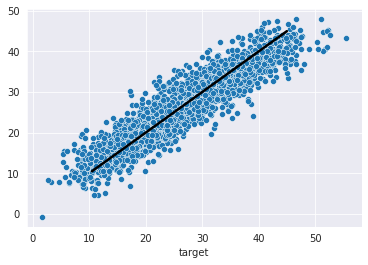

In [ ]:
full = pd.merge(left = df, right = y , left_index= True, right_index = True)
linear = LinearRegression()
Y = full['target']
linear.fit(full.drop(['target'],axis=1), Y)
Y_hat = linear.predict(full.drop(['target'],axis=1))
residuals = Y - Y_hat
y_vs_yhat_df = pd.DataFrame(zip(Y.values,Y_hat,residuals),columns=['y','yhat','residuals'],index=full.index)

r2 = r2_score(Y, Y_hat)
print("About " + str(round(r2 * 100,2)) + "% of variation in the Target can be explained by the model.")

sns.scatterplot(Y, Y_hat)
sns.lineplot(np.linspace(10.5,45),np.linspace(10.5,45), color='black', linewidth=2.5)
plt.show()

In [ ]:
standard_residuals = (residuals - residuals.mean()) / residuals.std()
outliers = full[abs(standard_residuals) > 3]
y_vs_yhat_df.loc[y_vs_yhat_df.index.isin(outliers.index),'Outlier'] = 1
y_vs_yhat_df.loc[y_vs_yhat_df['Outlier'] != 1 ,'Outlier'] = 0

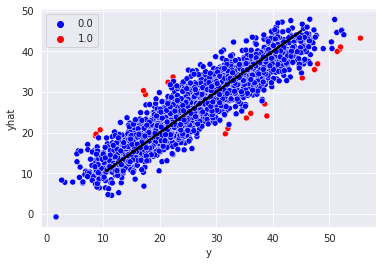

In [ ]:
sns.scatterplot(data = y_vs_yhat_df, x='y', y='yhat',hue ='Outlier', palette = ['blue','red'])
sns.lineplot(np.linspace(10.5,45),np.linspace(10.5,45), color='black', linewidth=2.5)
plt.show()

In [ ]:
df = df.loc[y_vs_yhat_df[y_vs_yhat_df['Outlier'] == 0].index,:]

In [ ]:
df = df.drop(list(test.columns[test.nunique()== 1 ]),axis=1)
test = test.drop(list(test.columns[test.nunique()== 1]),axis=1)

## Modelling

In [ ]:
full = pd.merge(left = df, right = y , left_index= True, right_index = True)
train_y = full['target']
train_X = full.drop(['target'],axis=1)

dev_train, dev_test = train_test_split(full, test_size=0.2 ,shuffle=True)
dev_train_y = dev_train['target']
dev_train_X = dev_train.drop(['target'],axis=1)
dev_test_y = dev_test['target']
dev_test_X = dev_test.drop(['target'],axis=1)

## Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=10)    #Selecting the top n features, from about 70, to improve model robustness.
_ = rfe.fit(train_X,train_y)
print('Important Features\n',train_X.columns[rfe.support_])
rf = RandomForestRegressor()
_ = rf.fit(rfe.transform(train_X), train_y)
print("\n Accuracy: ",rf.score(rfe.transform(train_X), train_y))

Important Features
 Index(['psa_00', 'car_00', 'car_01', 'pw_00', 'lat', 'lon', 'Household_Size',
       'pw_00 car_01', 'car_01 pg_00', 'car_01 lln_00'],
      dtype='object')

 Accuracy:  0.9793710964971631


In [ ]:
# Work with the set of predictors identified by RFE
best_predictors = rfe.support_              # identifies features used
new_features = []                           # X with selected features
for feature, predictor in list(zip(train_X, best_predictors)):
    if predictor == True:
        new_features.append(feature)

print(new_features)
train_X_rfe = train_X[new_features]
train_X_rfe.shape

['psa_00', 'car_00', 'car_01', 'pw_00', 'lat', 'lon', 'Household_Size', 'pw_00 car_01', 'car_01 pg_00', 'car_01 lln_00']


(2509, 10)

## Feature Visualizations

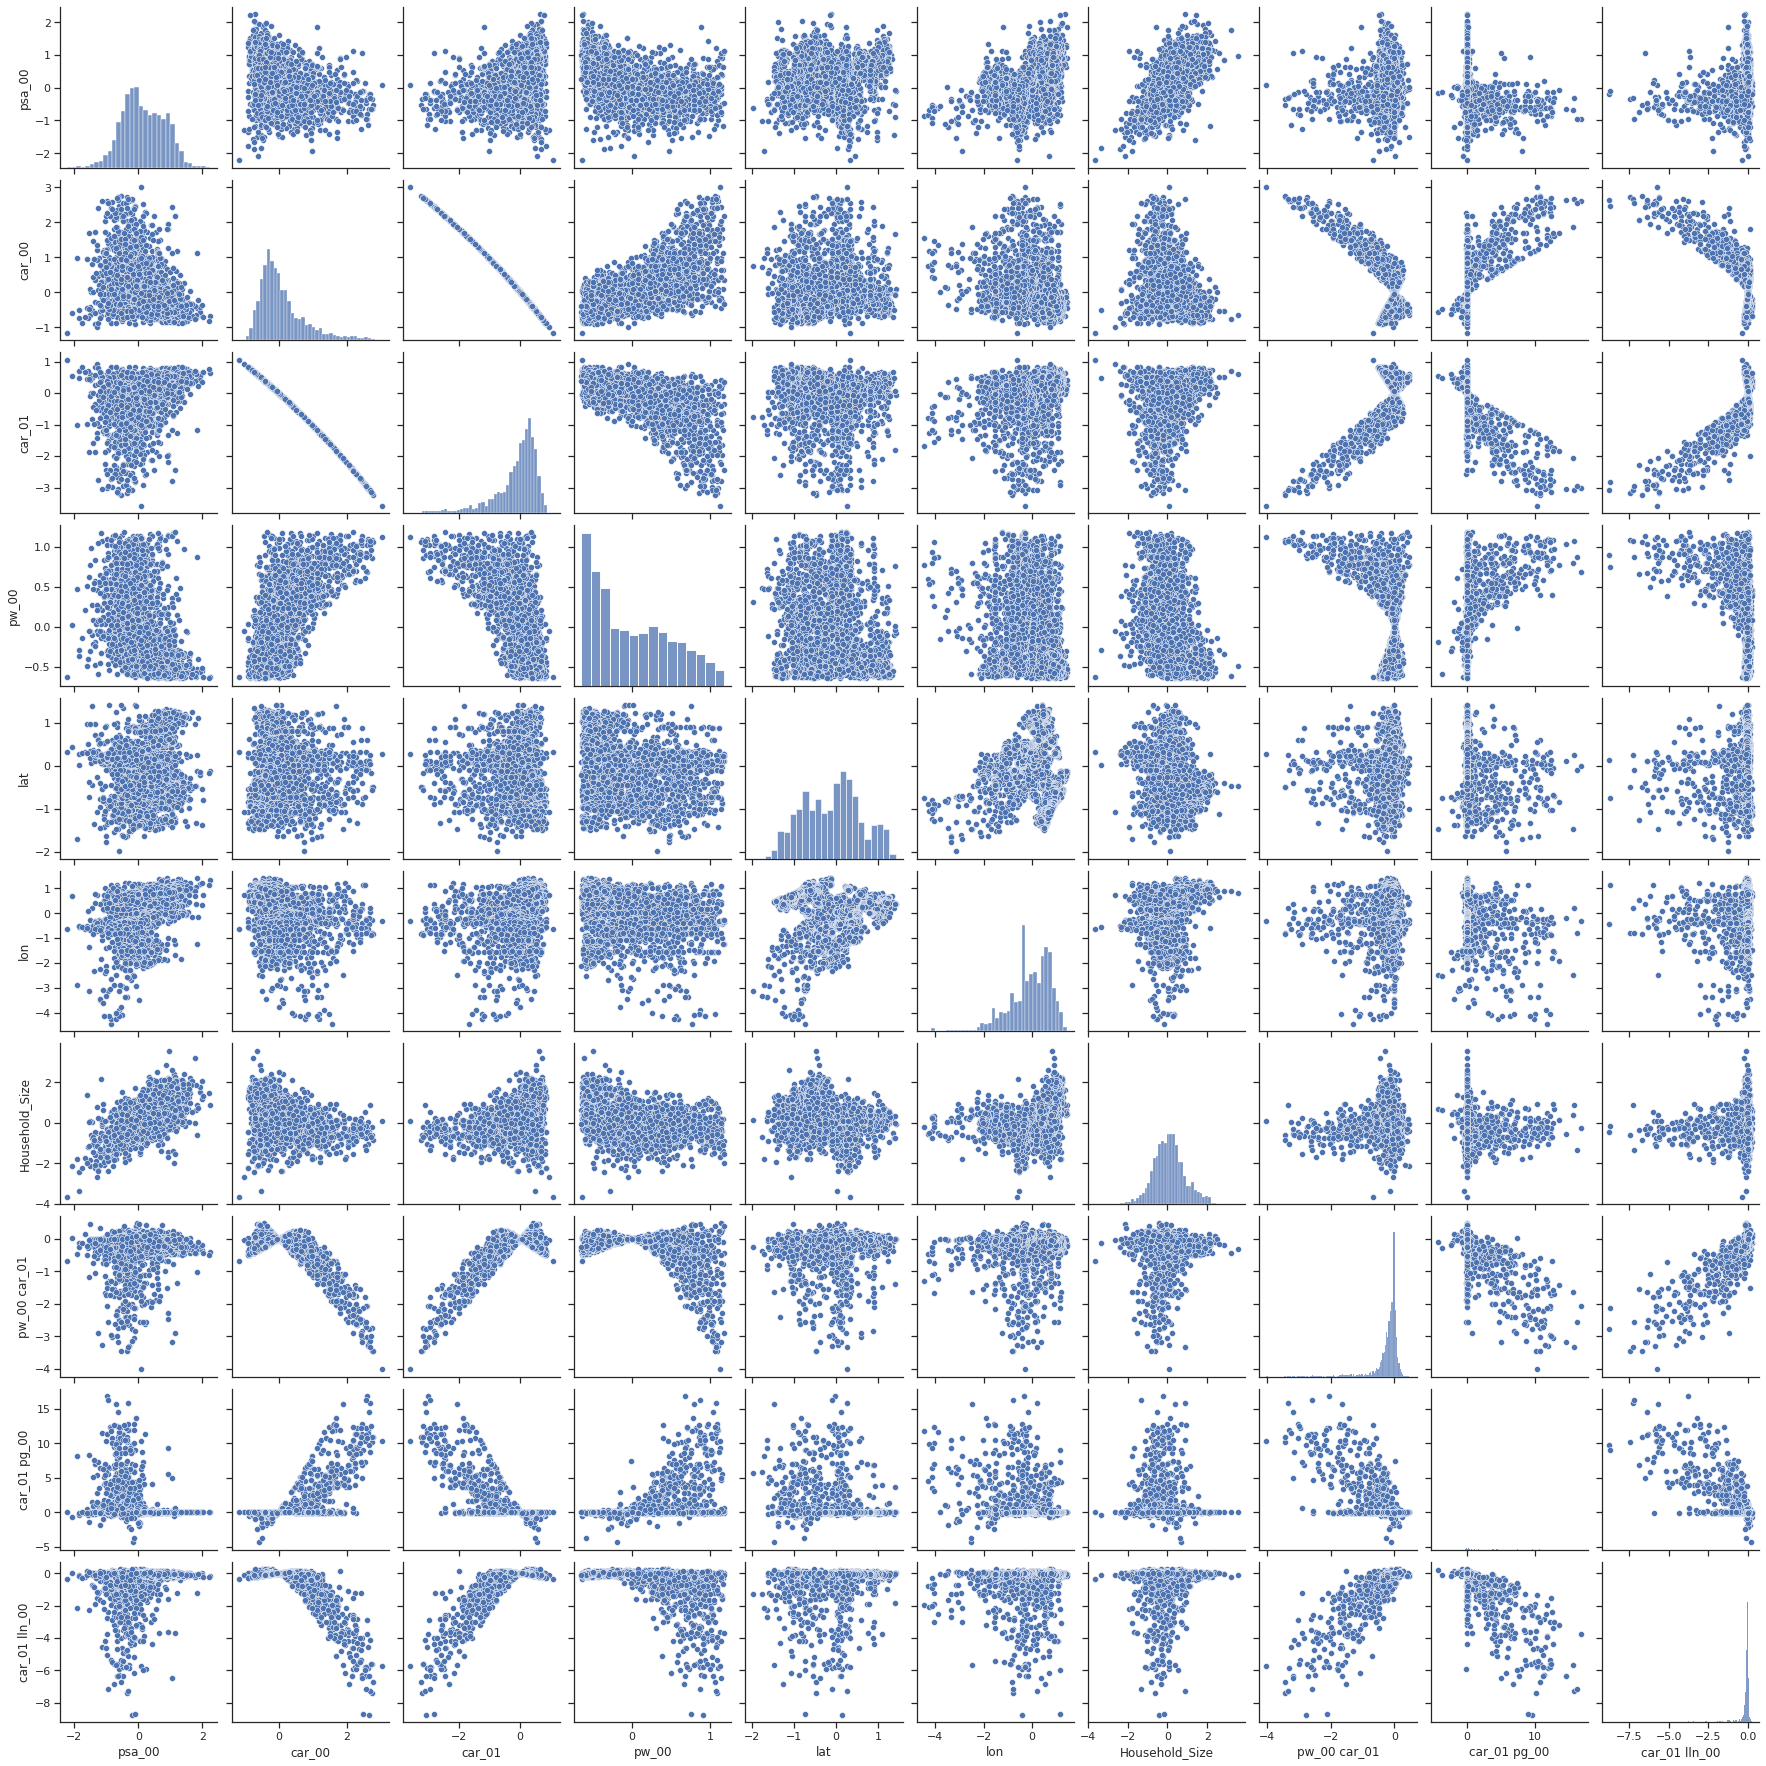

In [ ]:
sns.set_theme(style="ticks")
sns.color_palette("hls", 8)
sns.pairplot(train_X_rfe,palette="light:m_r")

                                             |          | [  0%]   00:00 -> (? left)


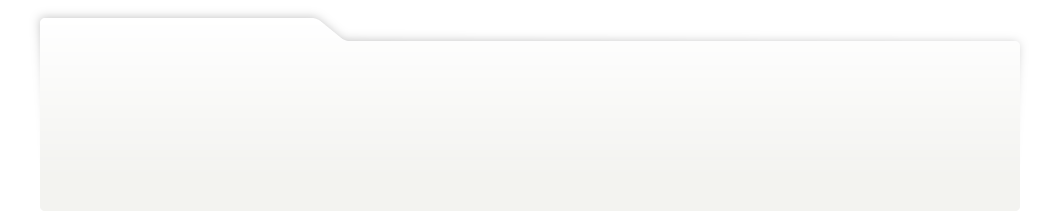
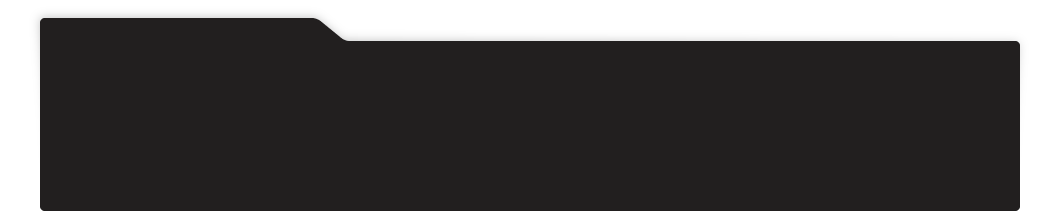
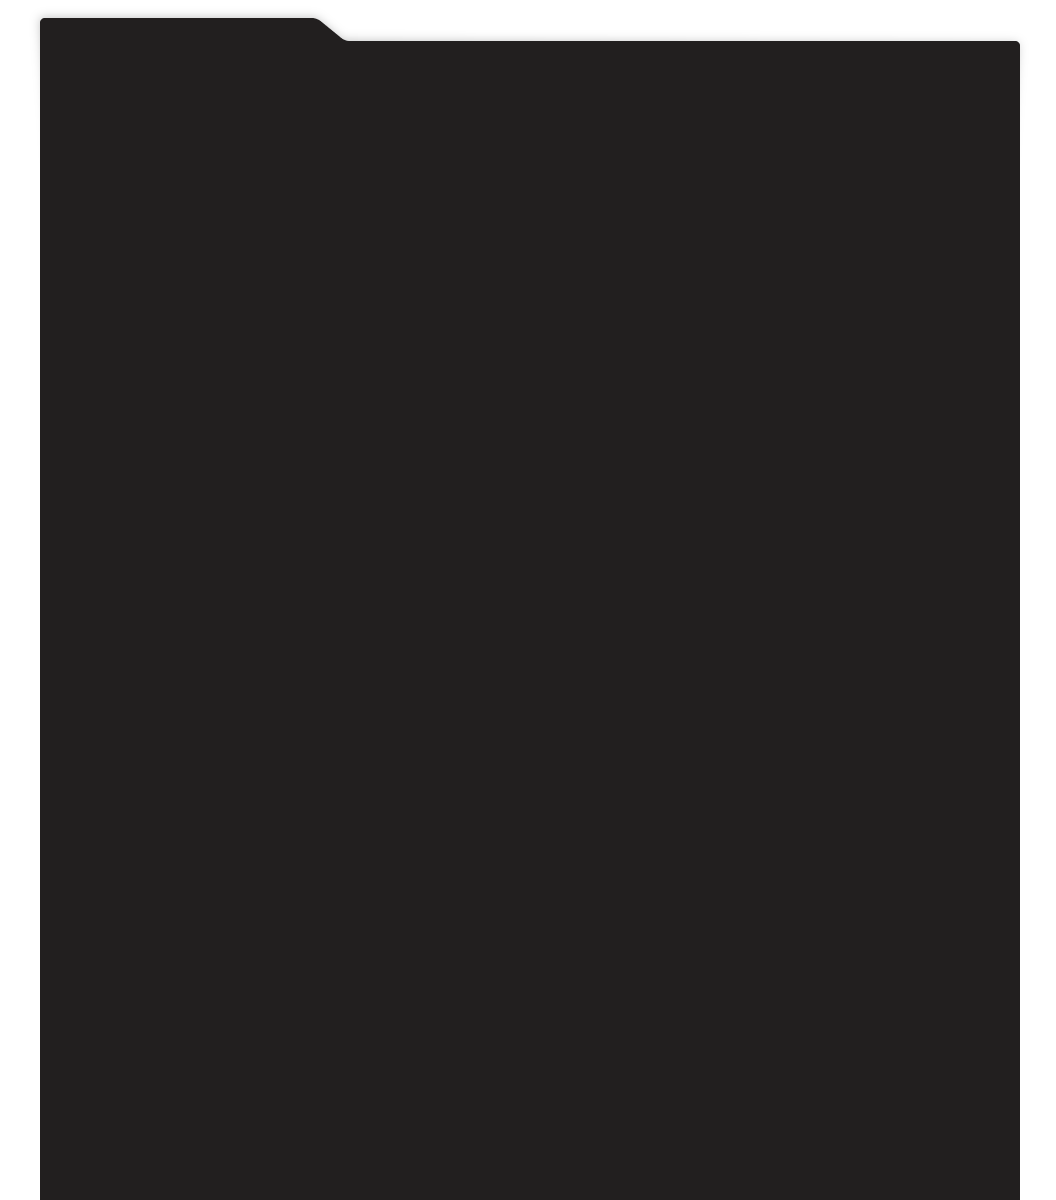
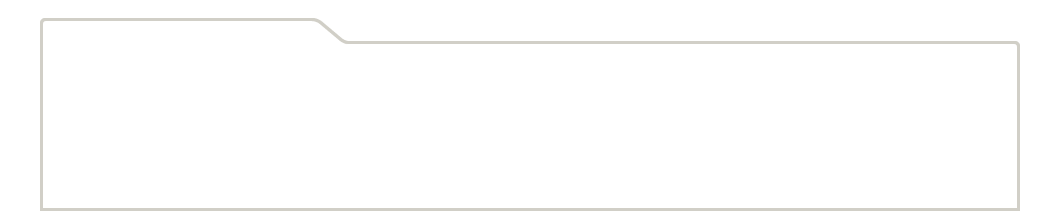
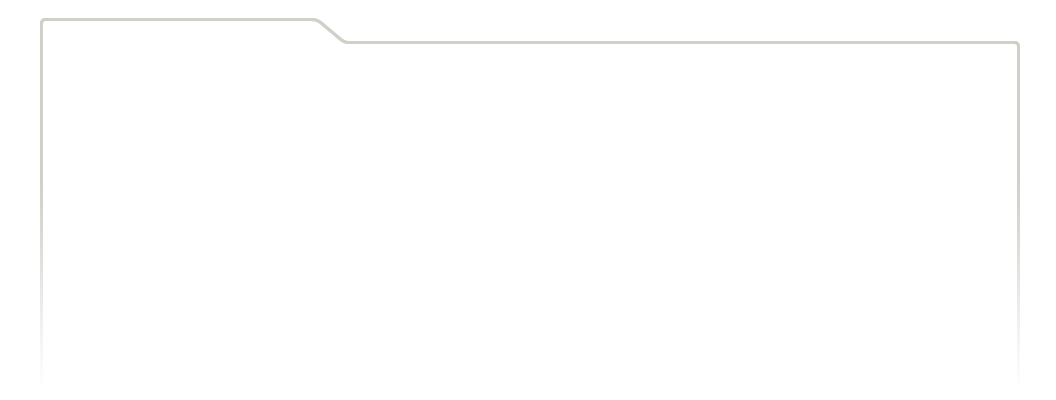
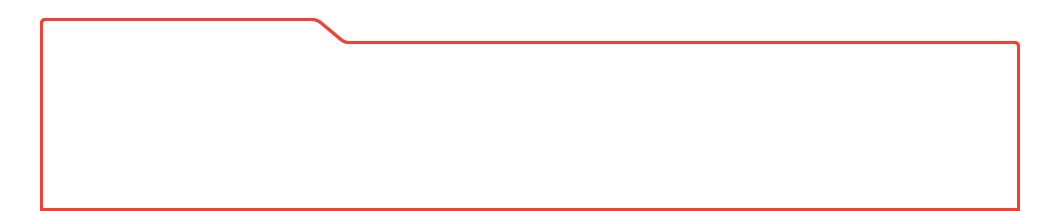
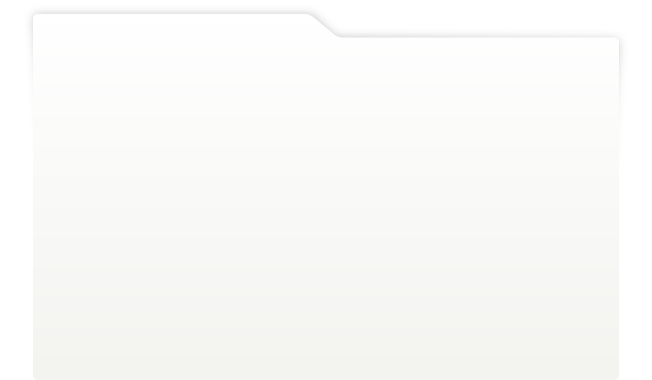
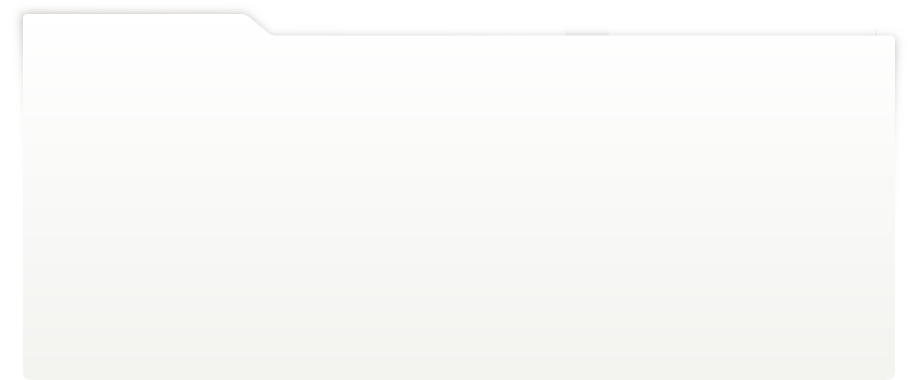
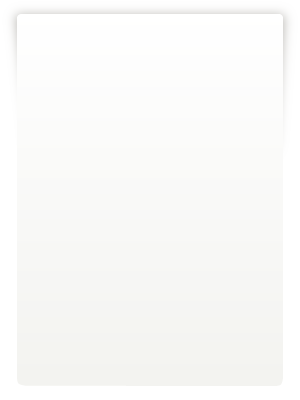
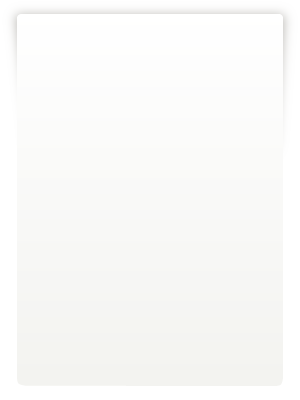
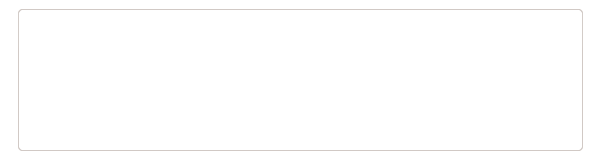
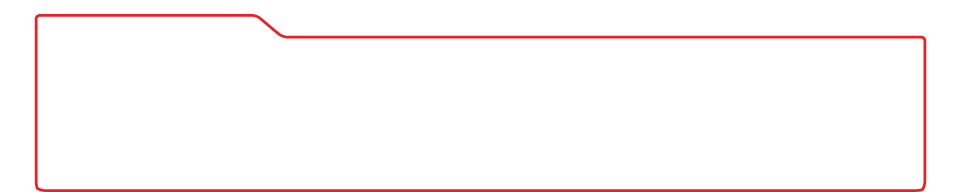
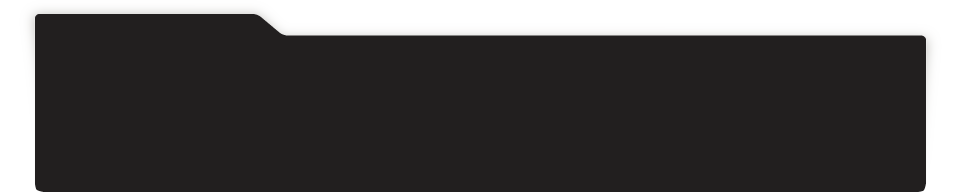
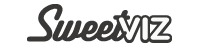
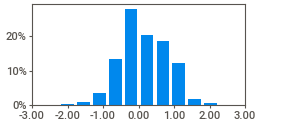
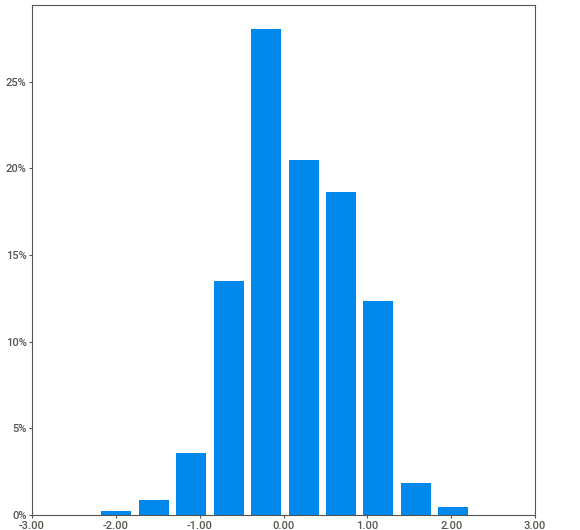
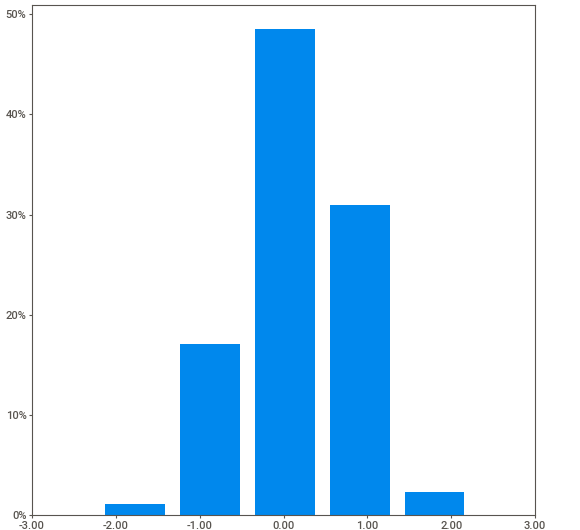
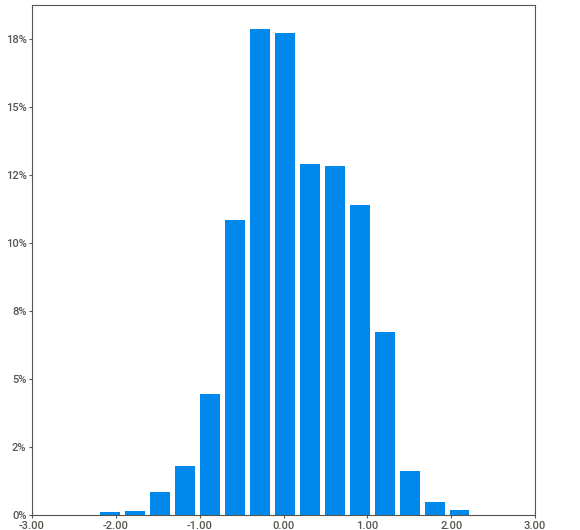
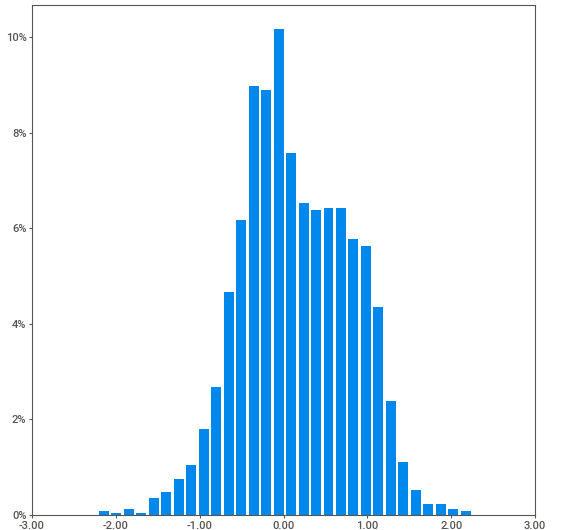
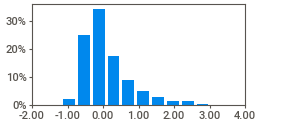
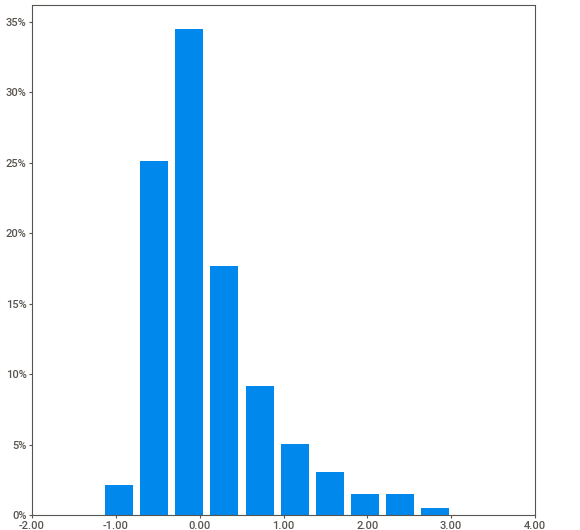
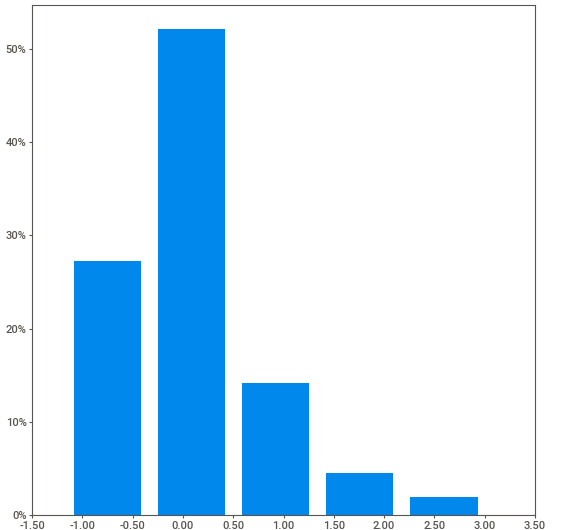
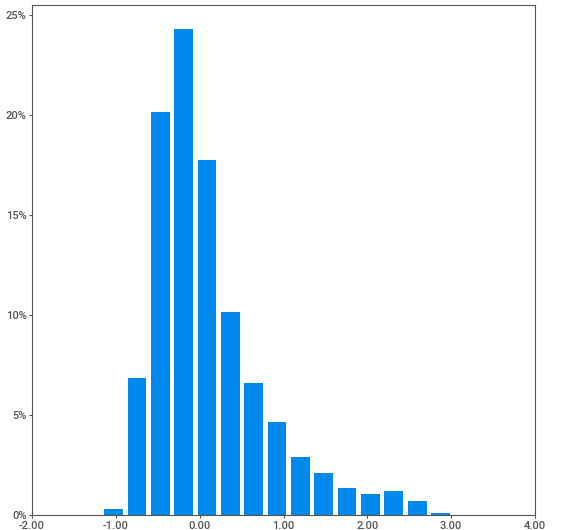
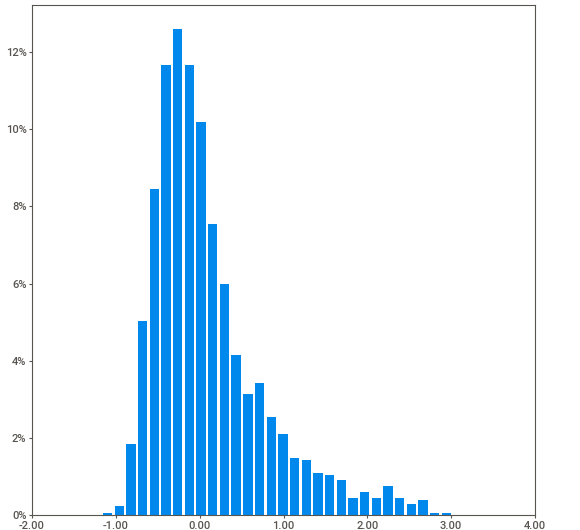
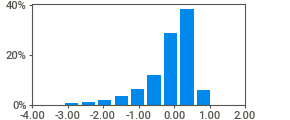
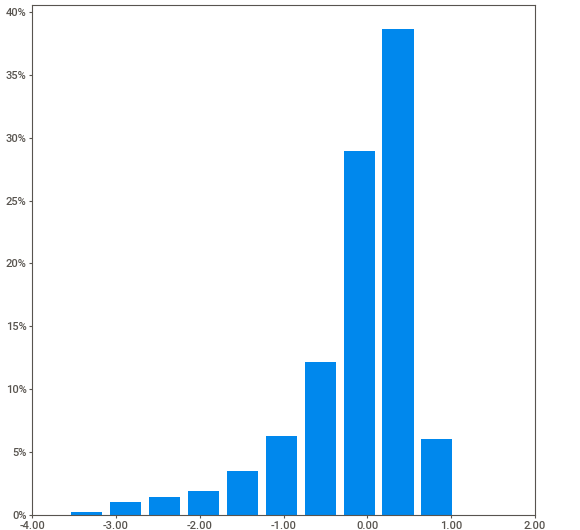
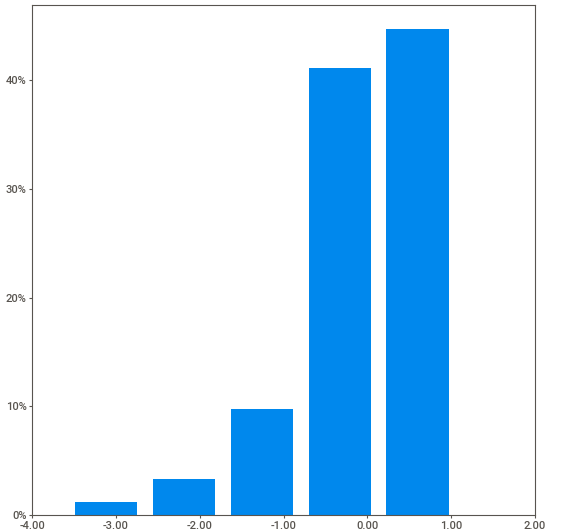
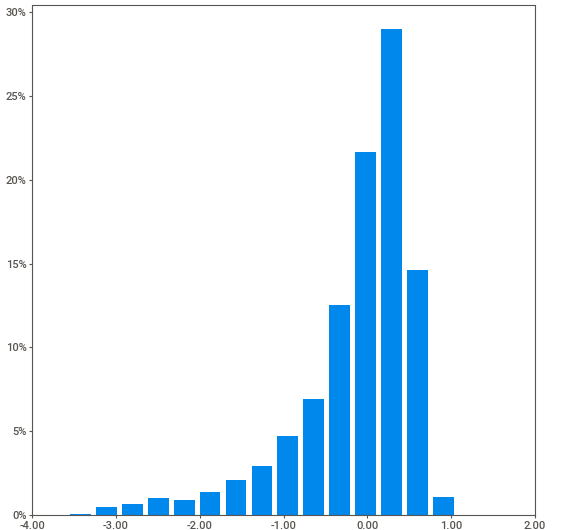
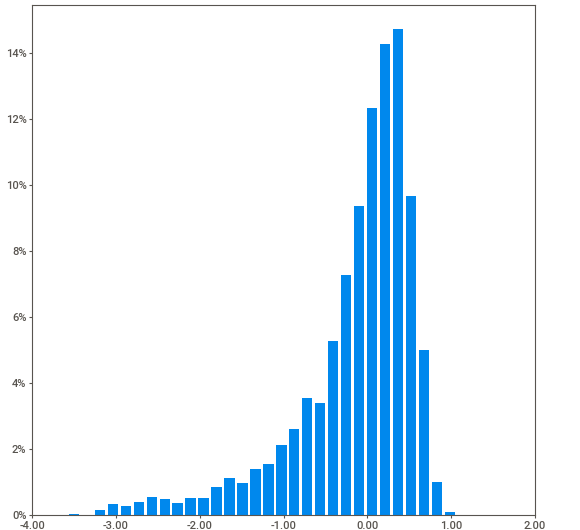
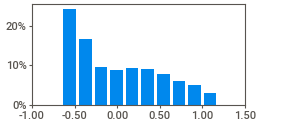
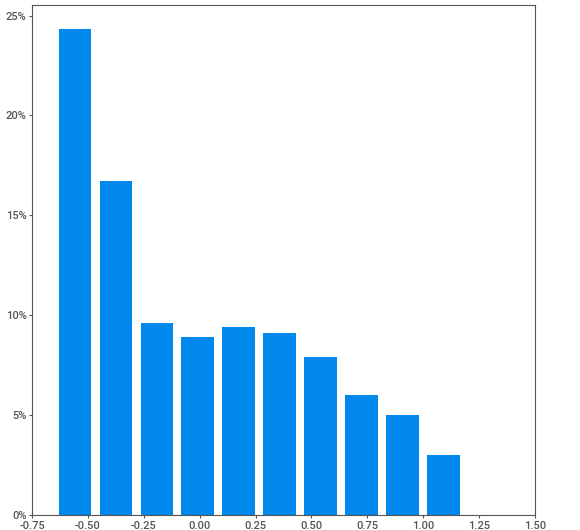
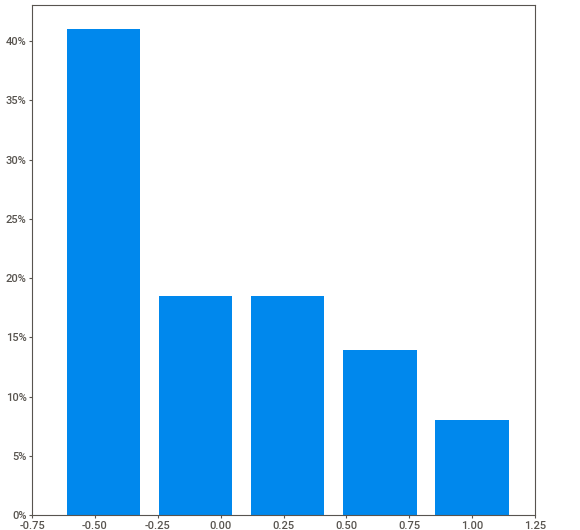
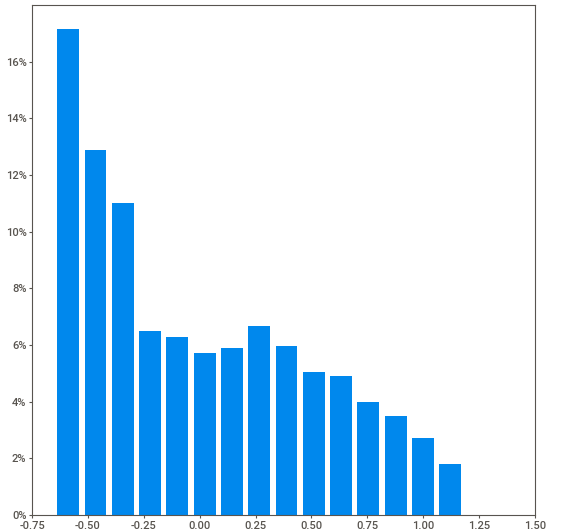
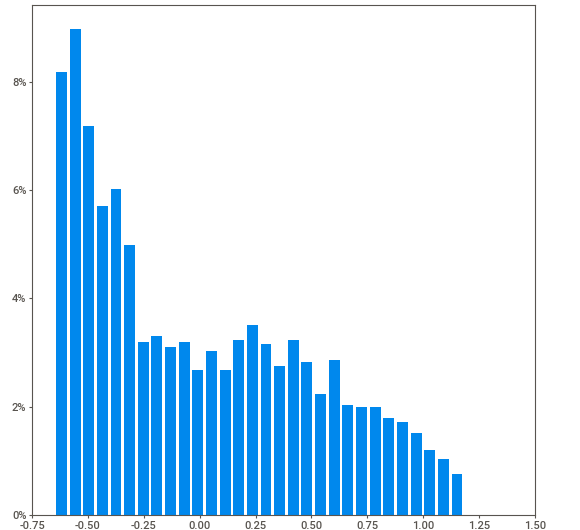
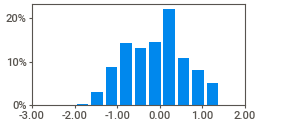
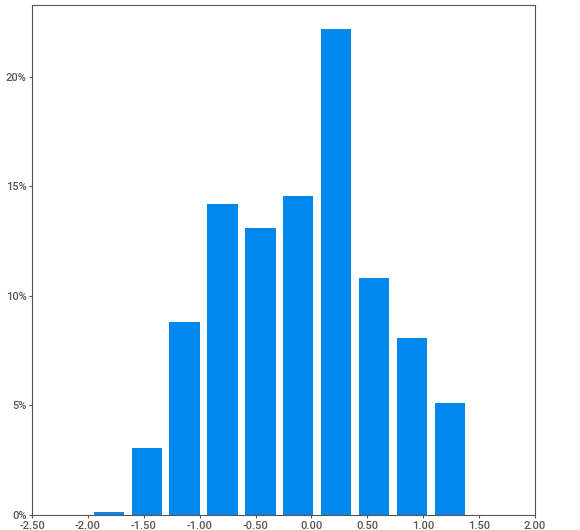
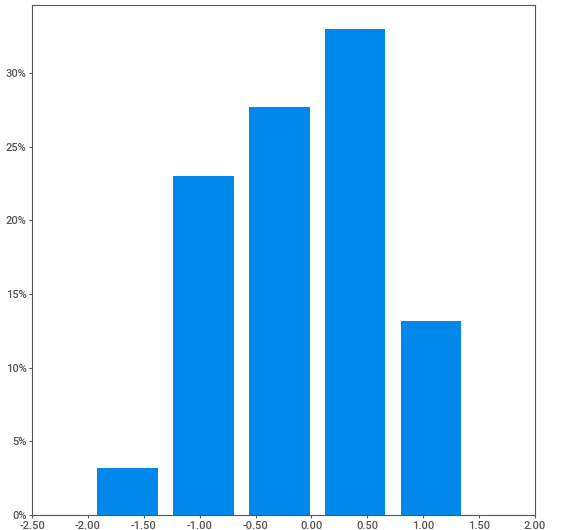
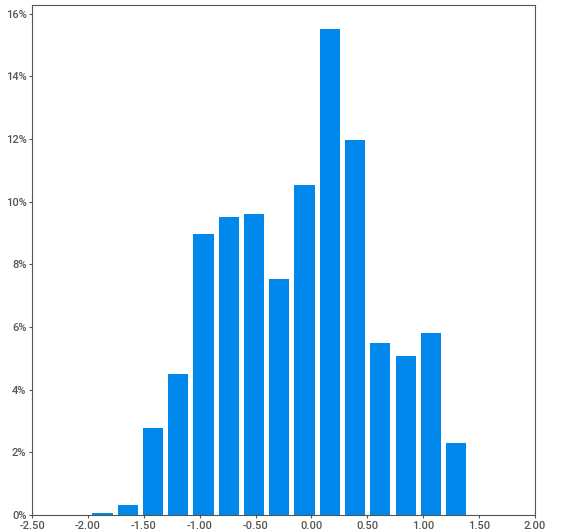
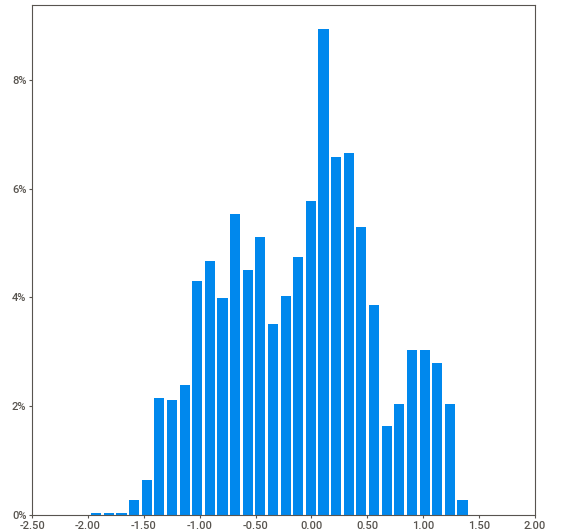
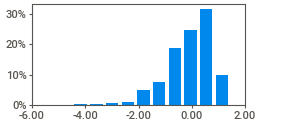
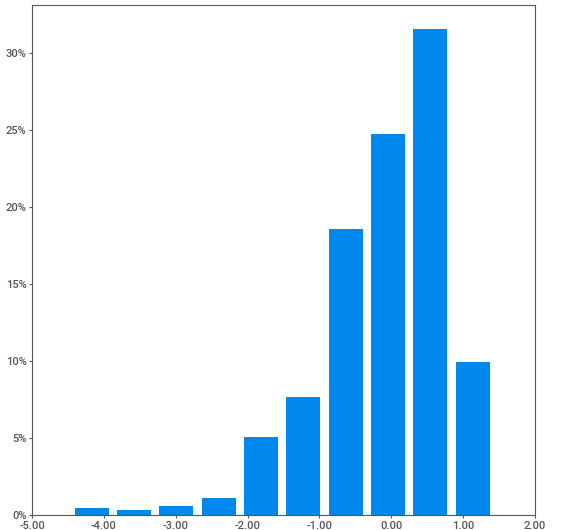
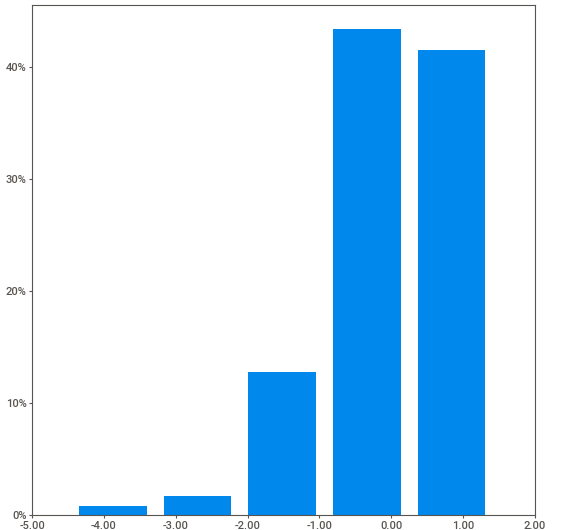
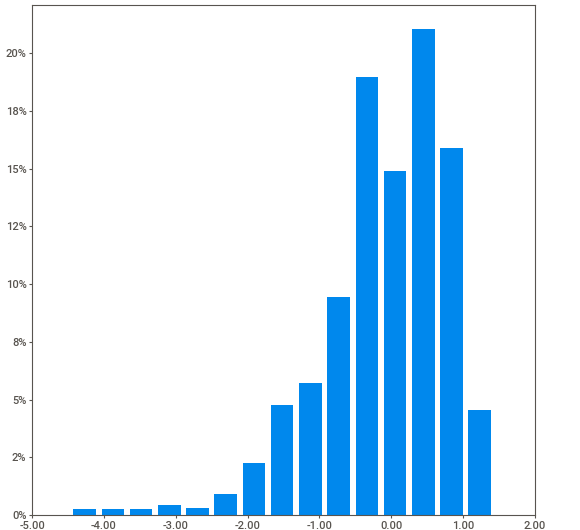
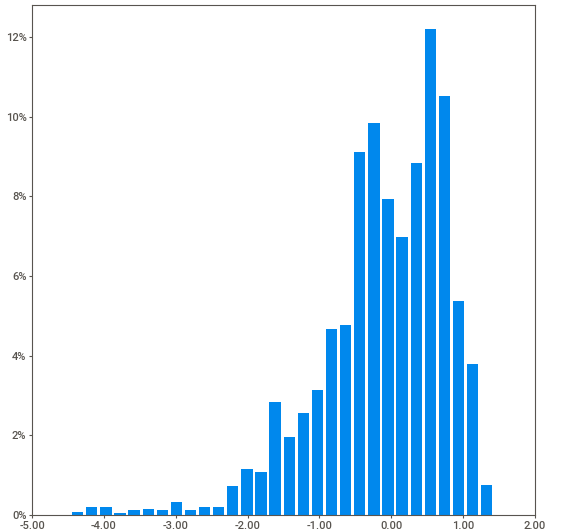
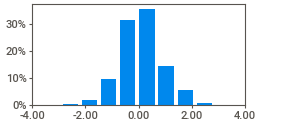
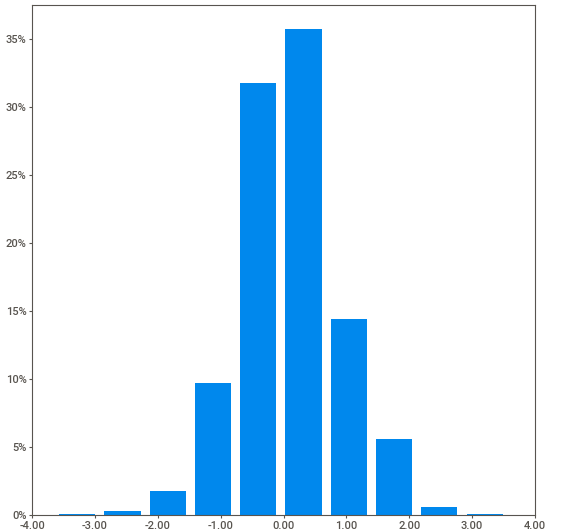
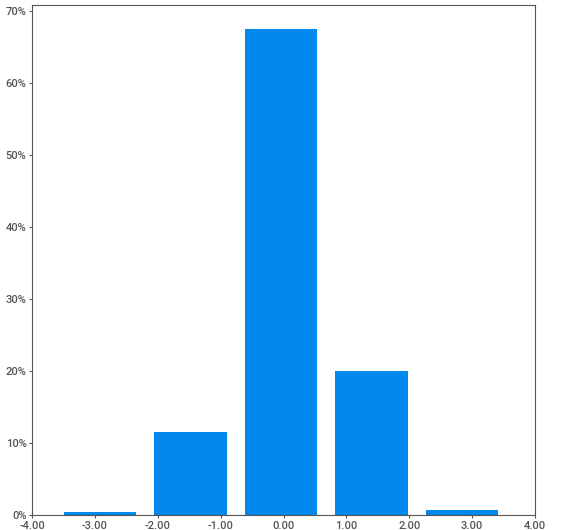
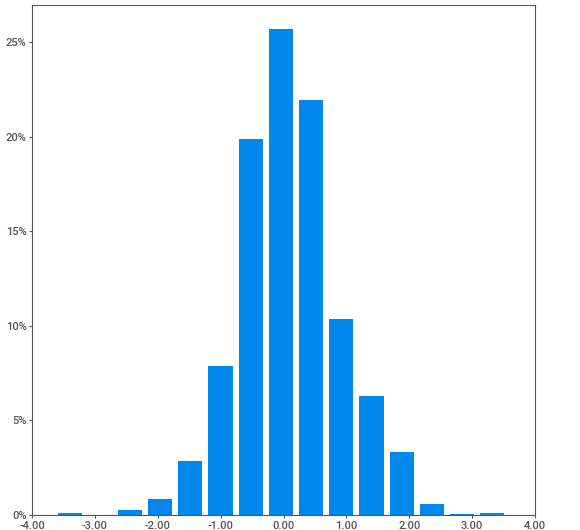
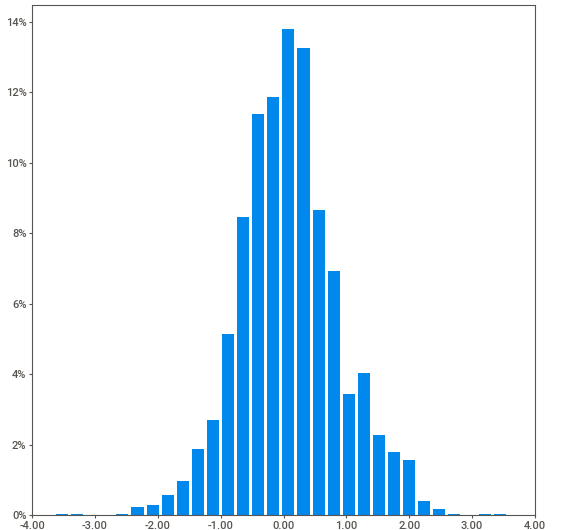
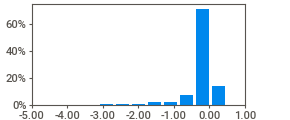
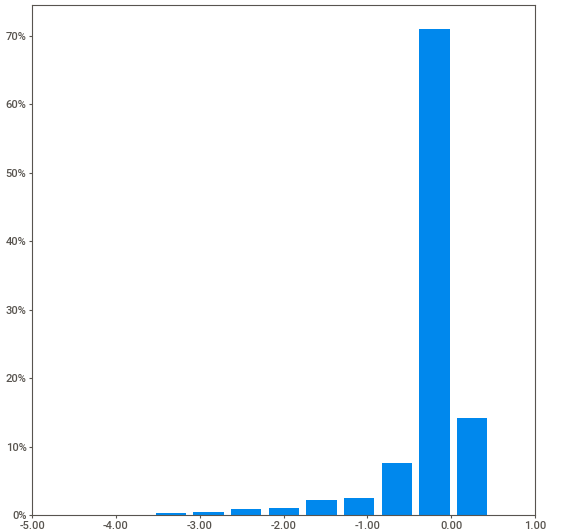
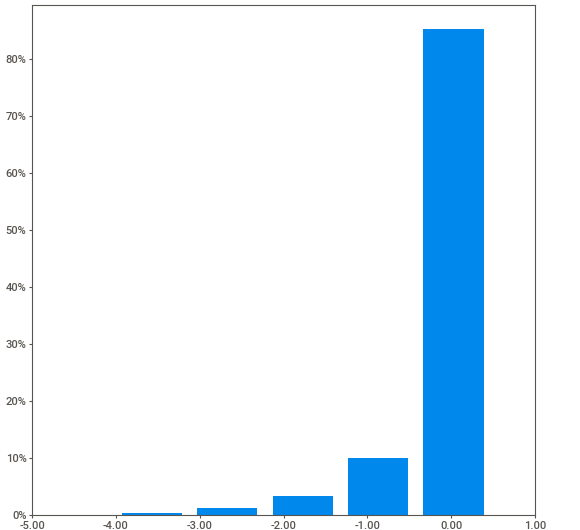
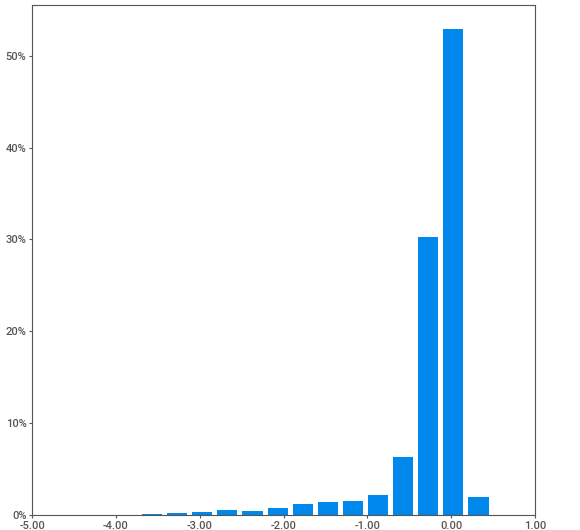
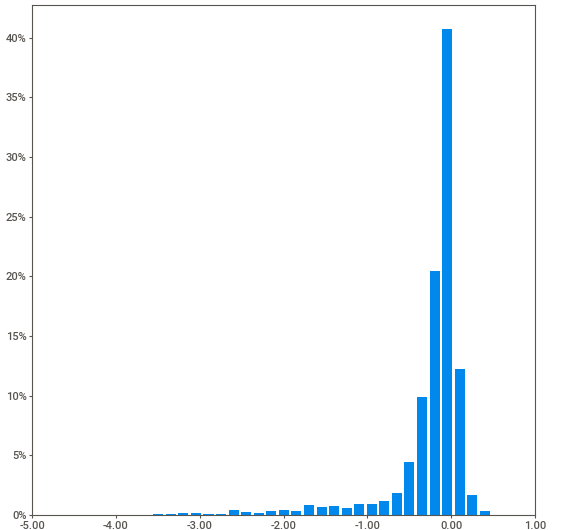
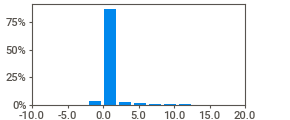
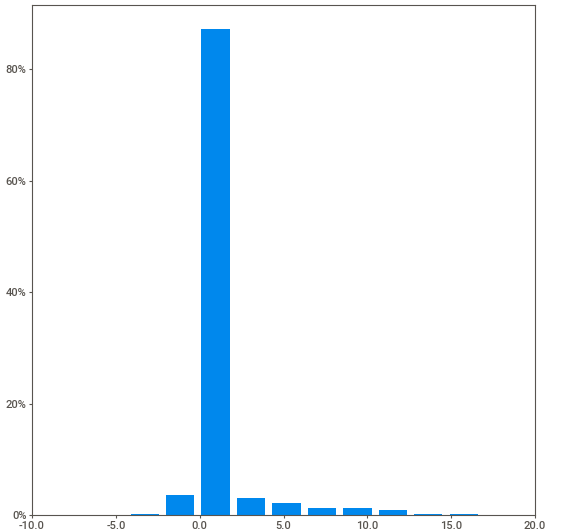
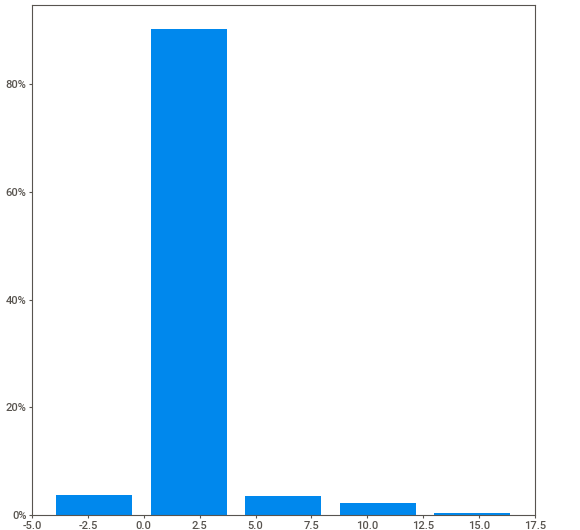
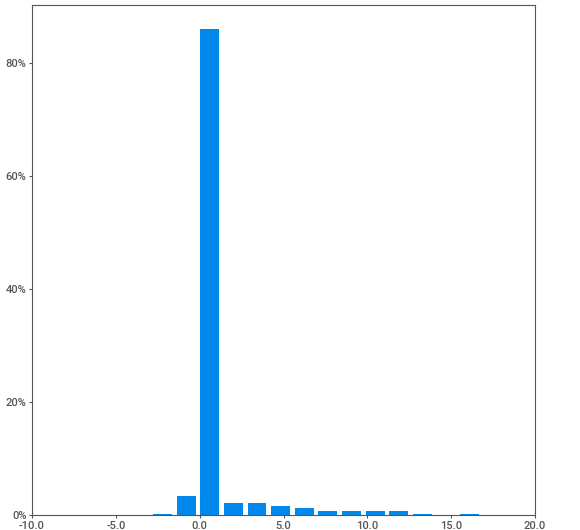
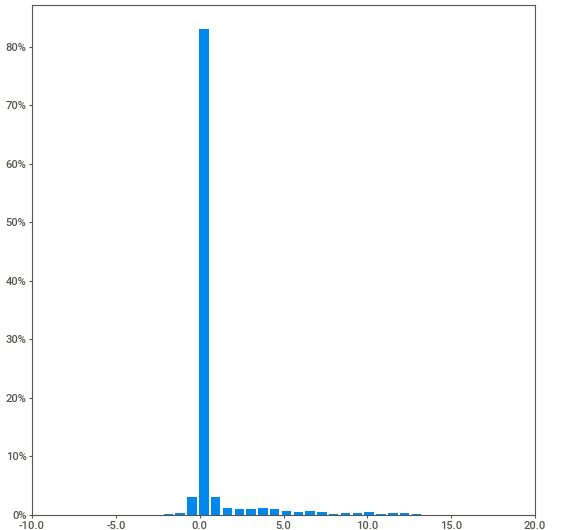
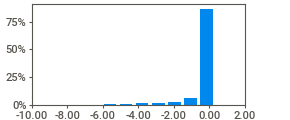
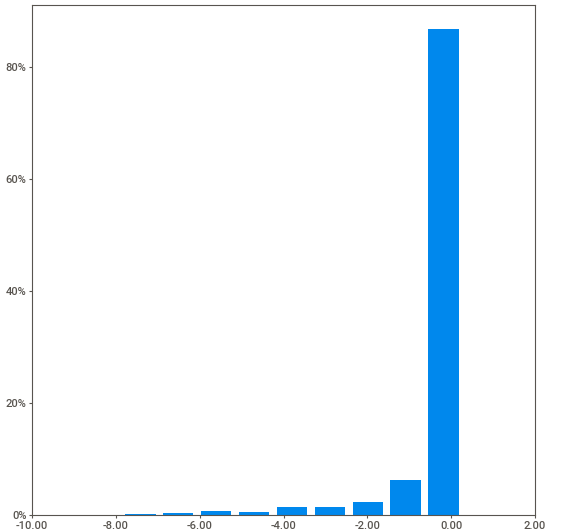
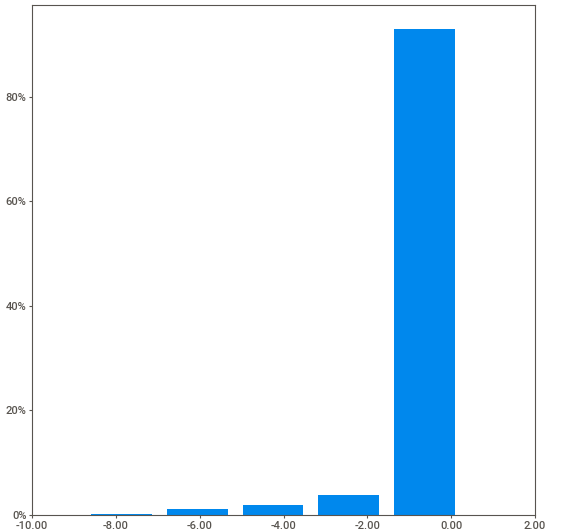
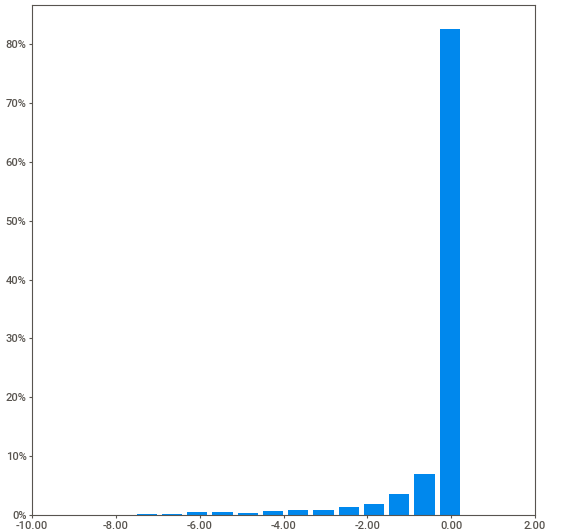
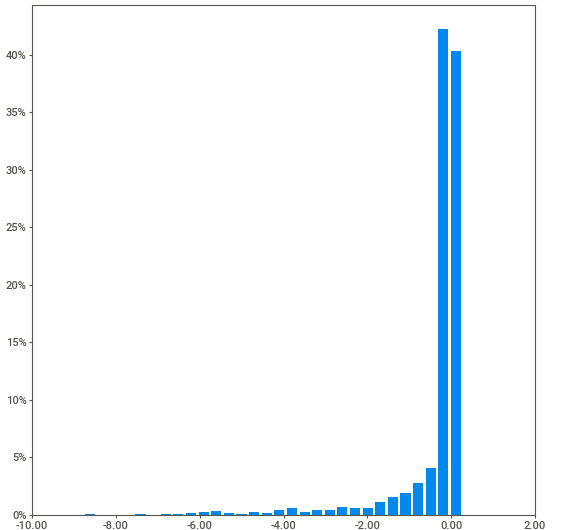
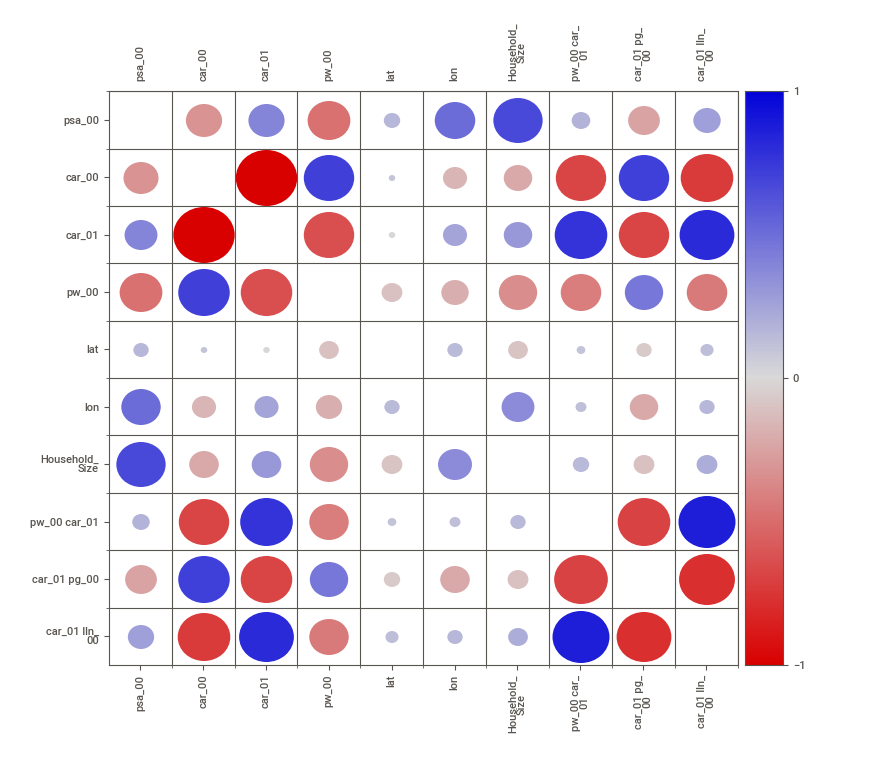
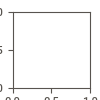

In [ ]:
# Sweetviz as an example of automated visualization

vizreport = sv.analyze(train_X_rfe)           
vizreport.show_notebook(layout='widescreen', w=1500, h=300, scale=0.7) #widescreen layout
#vizreport.show_notebook(layout='vertical', w=800, h=300, scale=0.7)   #vertical layout

## XAI

In [ ]:
!pip install shap==0.40.0
import shap

     |████████████████████████████████| 564 kB 11.3 MB/s 


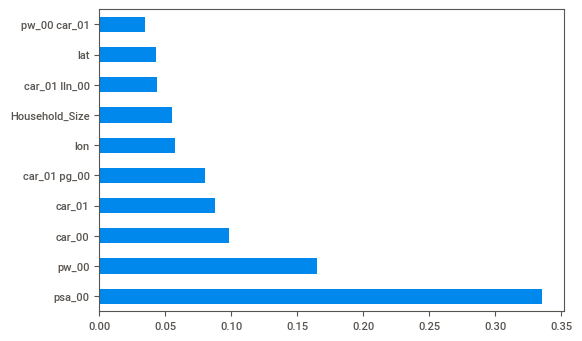

In [ ]:
# Feature Importance using the builtin in RandomForestRegressor (based upon impurity analysis)
RF_feature_importances = pd.Series(rf_final.feature_importances_, index=train_X_rfe.columns)
RF_feature_importances.nlargest(10).plot(kind='barh')

## Validation with a few regressors

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Fit a basic linear regression model, keeping the last 1000 rows for scoring
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(train_X_rfe[:-1000], train_y[:-1000])

LinearRegression()

In [ ]:
rf = RandomForestRegressor(n_estimators=100) # My go-to quick model for regression tasks.
rf.fit(train_X_rfe[:-1000], train_y[:-1000])

RandomForestRegressor()

In [ ]:
rf.score(train_X_rfe[:-1000], train_y[:-1000]) # Very good!

0.9802469574709041

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE:", sqrt(mean_squared_error(train_y[:-1000], lm.predict(train_X_rfe[:-1000]))))

RMSE: 4.180320423462281


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE:", sqrt(mean_squared_error(train_y[:-1000], rf.predict(train_X_rfe[:-1000]))))

RMSE: 1.303460673721093


In [ ]:
# Keras Deep Learning model definition
def BuildModel():
 model = Sequential()
 model.add(Dense(50, input_dim=10,activation='relu')) 
 model.add(Dense(50, activation='relu')) 
 model.add(Dense(1,activation='linear'))
 model.compile(loss="mean_squared_error", optimizer="adam")   
 return model

In [ ]:
# Stacked Ensemble
# Code in this snippet adapted from https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

# get a stacking ensemble of models
def get_stacking():
  # define the base models
  level0 = list()
  level0.append(('MLR', linear_model.LinearRegression()))
  level0.append(('Ridge', Ridge(alpha=0.5)))
  level0.append(('RF', RandomForestRegressor()))
  level0.append(('XGB', XGBRegressor(objective ='reg:squarederror')))
  # define meta learner model
  level1 = linear_model.LinearRegression()
  # define the stacking ensemble
  model = StackingRegressor(estimators=level0, final_estimator=level1, cv=10)
  return model
 
# get a list of models to evaluate
def get_models():
  models = dict()
  models['Multiple Linear Regression'] = linear_model.LinearRegression()
  models['Ridge Regression'] = Ridge(alpha=0.5)
  models['Random Forest'] = RandomForestRegressor()
  models['XGBoost'] = XGBRegressor(objective ='reg:squarederror')
  models['Stacked Ensemble'] = get_stacking()
  return models

## Regressor Assessment

In [ ]:
from numpy.ma.core import absolute
# Regressor Development and Assessment

names = ['Multiple Linear Regression', 'Lasso Regression', 'Ridge Regression','ElasticNet Regression','kNN', 'SVM','Multilayer Perceptron','Random Forest', 'XGBoost', 'AdaBoost','LightGBM']
regressors = [linear_model.LinearRegression(),
              Lasso(alpha=0.5),
              Ridge(alpha=0.5),
              ElasticNet(alpha=0.25, l1_ratio=0.5),
              KNeighborsRegressor(n_neighbors=5),
              SVR(kernel = 'poly'),   #Can try kernels 'poly', 'linear', 'rbf' and 'sigmoid' kernels
              DecisionTreeRegressor(),
              MLPRegressor(hidden_layer_sizes=(50,50,1),
                       max_iter = 300,activation = 'relu',         
                       solver = 'adam'),
              RandomForestRegressor(criterion='squared_error'),
              XGBRegressor(objective ='reg:squarederror'),
              AdaBoostRegressor(loss='square'),
              lgb.LGBMRegressor(objective='mean_squared_error')
              ] 

for name, regr in zip(names, regressors):
  print('REGRESSOR: ',name)
  pipe = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', regr)])
  model = TransformedTargetRegressor(regressor=pipe, transformer=MinMaxScaler())
  cv = KFold(n_splits=10, shuffle=True, random_state=1)
  scores = cross_val_score(model, train_X_rfe, train_y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
  score_mean = mean(absolute(scores))
  score_stdev = np.std(scores)
  print('Mean (std Dev) of MSE: %.3f (%.3f)\n' % (score_mean, score_stdev))

REGRESSOR:  Multiple Linear Regression
Mean (std Dev) of MSE: 17.870 (1.690)

REGRESSOR:  Lasso Regression
Mean (std Dev) of MSE: 85.587 (4.024)

REGRESSOR:  Ridge Regression
Mean (std Dev) of MSE: 17.924 (1.662)

REGRESSOR:  ElasticNet Regression
Mean (std Dev) of MSE: 85.587 (4.024)

REGRESSOR:  kNN
Mean (std Dev) of MSE: 13.823 (1.088)

REGRESSOR:  SVM
Mean (std Dev) of MSE: 14.265 (1.232)

REGRESSOR:  Multilayer Perceptron
Mean (std Dev) of MSE: 24.986 (2.118)

REGRESSOR:  Random Forest
Mean (std Dev) of MSE: 33.004 (30.372)

REGRESSOR:  XGBoost
Mean (std Dev) of MSE: 12.571 (0.879)

REGRESSOR:  AdaBoost
Mean (std Dev) of MSE: 12.728 (0.989)

REGRESSOR:  LightGBM
Mean (std Dev) of MSE: 16.438 (0.707)



## Ensemble Assessment

In [ ]:
# Loop through ensembles and deep learning model
names = ['Random Forest', 'XGBoost', 'AdaBoost','Keras Deep Learning','Stacked Ensemble']
regressors = [RandomForestRegressor(),
              XGBRegressor(objective ='reg:squarederror'),
              AdaBoostRegressor(),
              KerasRegressor(build_fn=BuildModel,nb_epoch=500,epochs=500, batch_size=20,verbose=0),
              get_stacking()   
              ] 

for name, regr in zip(names, regressors):
  print('REGRESSOR: ',name)
  pipe = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', regr)])
  model = TransformedTargetRegressor(regressor=pipe, transformer=MinMaxScaler())
  cv = KFold(n_splits=10, shuffle=True, random_state=1)
  scores = cross_val_score(model, train_X_rfe, train_y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
  score_mean = mean(absolute(scores))
  score_stdev = np.std(scores)
  print('Mean (std Dev) of MSE: %.3f (%.3f)\n' % (score_mean, score_stdev))

REGRESSOR:  Random Forest
Mean (std Dev) of MSE: 12.816 (0.866)

REGRESSOR:  XGBoost
Mean (std Dev) of MSE: 12.728 (0.989)

REGRESSOR:  AdaBoost
Mean (std Dev) of MSE: 16.683 (0.873)

REGRESSOR:  Keras Deep Learning
Mean (std Dev) of MSE: 13.452 (1.221)

REGRESSOR:  Stacked Ensemble
Mean (std Dev) of MSE: 12.667 (0.814)



## Hyperparameter tuning for Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_X_rfe, train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2,3],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [5, 7, 9],
    'n_estimators': [200, 400, 500, 800]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(train_X_rfe, train_y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [5, 7, 9],
                         'n_estimators': [200, 400, 500, 800]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 500}

In [ ]:
rf_final = RandomForestRegressor(bootstrap = True, max_depth = 90, max_features = 3, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 500)

In [ ]:
rf_final.fit(train_X_rfe, train_y)

RandomForestRegressor(max_depth=90, max_features=3, min_samples_split=5,
                      n_estimators=500)

In [ ]:
# Make predictions
test['target'] = rf_final.predict(test[train_X_rfe.columns])
test.head()

total_households  total_individuals     dw_00     dw_01     dw_02  \
0          0.053934          -0.098116  0.627542 -0.150548 -0.148302   
1         -0.176225          -0.364323  0.271838 -0.156767  1.470936   
2         -0.958056          -0.655591 -0.401608 -0.039084  0.053410   
3         -0.120740           0.132928 -1.238290 -0.125321  0.226860   
4         -0.786702          -0.631851  0.612218 -0.122623 -0.196000   

      dw_03     dw_04       dw_05     dw_06     dw_07     dw_08     dw_09  \
0 -0.318040 -0.273051    9.530387 -0.367246 -0.075337 -0.164303 -0.280453   
1  1.536965  5.238531    3.758488  0.598767  0.139960  0.028135  0.787747   
2 -0.318040  0.615685   76.099426 -0.095442  0.630710 -0.020823 -0.280453   
3 -0.126800 -0.273051  122.552290  0.027553  1.887542 -0.193134  1.184640   
4 -0.318040  0.127862   -0.025957 -0.350226  0.265504 -0.191675  2.469338   

      dw_10     dw_11    psa_00    psa_01     psa_02    psa_03    psa_04  \
0  0.265931 -0.347031 -0.475462  0.626332  -0.613974 -0.392455 -0.152382   
1  5.835355  0.474804 -0.935663 -0.072891   1.085519  0.953602  3.081266   
2 -0.375095  0.619337 -0.052363 -0.348564  20.088281  1.910040 -0.376260   
3 -0.375095 -0.160997 -0.313285 -0.182344  -0.613974 -0.490702  2.465962   
4 -0.375095  0.034315 -0.144093  0.093799  -0.274660  0.987688 -0.560427   

     stv_00    stv_01    car_00    car_01    lln_00    lln_01     lan_00  \
0 -0.087172  0.084713  0.257771 -0.256175  1.244997 -1.288419  10.759966   
1  1.059369 -1.137257  1.926160 -2.129552  2.816817 -3.153693   6.444252   
2  0.312304 -0.314093  0.081197 -0.079806  0.484625 -0.483131  12.072713   
3  0.791569 -0.829997  1.080563 -1.131324  1.885477 -2.014341  11.102986   
4  0.398180 -0.403447  0.028396 -0.027818  0.925386 -0.942683  12.188707   

     lan_01    lan_02    lan_03    lan_04    lan_05    lan_06    lan_07  \
0  0.195355 -0.759290  2.948881 -0.115489 -0.073443 -0.230108 -0.039134   
1  3.144336 -0.778035  6.600524 -0.113621 -0.047588 -0.237796 -0.088324   
2 -0.081128 -0.783414  0.234225 -0.114657 -0.072205 -0.240916 -0.122060   
3  0.121848 -0.727971  0.246911 -0.115901 -0.065306 -0.260669 -0.056751   
4 -0.212668 -0.783989  0.047408 -0.113839 -0.075825 -0.244483 -0.062602   

     lan_08    lan_09    lan_10    lan_11    lan_12     lan_14     pg_00  \
0 -0.649172 -0.182666 -0.190596 -0.112843 -0.160530   1.513001 -6.785769   
1 -0.483503 -0.177586 -0.243133 -0.112843 -0.055404  11.901612 -4.307735   
2  0.045150  0.156300 -0.090224 -0.112843 -0.302027  -0.012122 -7.563089   
3 -0.555991 -0.203668 -0.220961 -0.112843 -0.467854   7.847984 -7.374607   
4 -0.560456 -0.203668 -0.091683 -0.112843 -0.357504  -0.012122 -7.945793   

       pg_01     pg_02     pg_03     pg_04    lgt_00     pw_00     pw_01  \
0  47.740987  0.478185  1.947785  0.545970  0.041348  0.517079  0.315268   
1  15.007704  0.264183  6.904459  2.192800  0.246829  0.852130 -0.188528   
2  56.273553 -0.069155 -0.016234  0.497909  0.368722  0.766633 -0.026192   
3  52.458474  1.288272  1.285590  0.433554  0.308328  0.524762  0.346171   
4  58.147762  1.311737 -0.029784  0.319830  0.224270  0.326115  0.631573   

      pw_02     pw_03     pw_04     pw_05     pw_06       lat       lon  \
0 -0.340576 -0.266158 -0.214321 -0.157978 -0.173386 -2.031404 -1.869711   
1 -0.358227 -0.285565 -0.214321 -0.157978 -0.208730 -1.815439 -1.611028   
2 -0.405594 -0.257152 -0.214321 -0.157978 -0.236430 -1.913227 -1.608056   
3 -0.405195 -0.298157 -0.186829 -0.157978 -0.223321 -1.905892 -1.616009   
4 -0.413153 -0.298157 -0.214321 -0.157978 -0.220649 -1.902541 -1.610033   

         NL  Household_Size  car_00 pg_00  pw_00 pg_00  pw_00 car_01  \
0 -1.201304       -0.231796     -1.749173    -3.508782     -0.132463   
1 -1.201304       -0.234145     -8.297385    -3.670751     -1.814655   
2 -0.049749        1.481318     -0.614100    -5.798110     -0.061182   
3 -0.030202        0.969895     -7.968730    -3.869915     -0.593676   
4 -0.031540      

In [ ]:
# Load the test data
file_ = "drive/My Drive/Hackathon/Trailblazers/Test.csv" 
dummy = pd.read_csv(file_)

In [ ]:
test['ward'] = dummy['ward']

In [ ]:
test.head()

total_households  total_individuals     dw_00     dw_01     dw_02  \
0          0.053934          -0.098116  0.627542 -0.150548 -0.148302   
1         -0.176225          -0.364323  0.271838 -0.156767  1.470936   
2         -0.958056          -0.655591 -0.401608 -0.039084  0.053410   
3         -0.120740           0.132928 -1.238290 -0.125321  0.226860   
4         -0.786702          -0.631851  0.612218 -0.122623 -0.196000   

      dw_03     dw_04       dw_05     dw_06     dw_07     dw_08     dw_09  \
0 -0.318040 -0.273051    9.530387 -0.367246 -0.075337 -0.164303 -0.280453   
1  1.536965  5.238531    3.758488  0.598767  0.139960  0.028135  0.787747   
2 -0.318040  0.615685   76.099426 -0.095442  0.630710 -0.020823 -0.280453   
3 -0.126800 -0.273051  122.552290  0.027553  1.887542 -0.193134  1.184640   
4 -0.318040  0.127862   -0.025957 -0.350226  0.265504 -0.191675  2.469338   

      dw_10     dw_11    psa_00    psa_01     psa_02    psa_03    psa_04  \
0  0.265931 -0.347031 -0.475462  0.626332  -0.613974 -0.392455 -0.152382   
1  5.835355  0.474804 -0.935663 -0.072891   1.085519  0.953602  3.081266   
2 -0.375095  0.619337 -0.052363 -0.348564  20.088281  1.910040 -0.376260   
3 -0.375095 -0.160997 -0.313285 -0.182344  -0.613974 -0.490702  2.465962   
4 -0.375095  0.034315 -0.144093  0.093799  -0.274660  0.987688 -0.560427   

     stv_00    stv_01    car_00    car_01    lln_00    lln_01     lan_00  \
0 -0.087172  0.084713  0.257771 -0.256175  1.244997 -1.288419  10.759966   
1  1.059369 -1.137257  1.926160 -2.129552  2.816817 -3.153693   6.444252   
2  0.312304 -0.314093  0.081197 -0.079806  0.484625 -0.483131  12.072713   
3  0.791569 -0.829997  1.080563 -1.131324  1.885477 -2.014341  11.102986   
4  0.398180 -0.403447  0.028396 -0.027818  0.925386 -0.942683  12.188707   

     lan_01    lan_02    lan_03    lan_04    lan_05    lan_06    lan_07  \
0  0.195355 -0.759290  2.948881 -0.115489 -0.073443 -0.230108 -0.039134   
1  3.144336 -0.778035  6.600524 -0.113621 -0.047588 -0.237796 -0.088324   
2 -0.081128 -0.783414  0.234225 -0.114657 -0.072205 -0.240916 -0.122060   
3  0.121848 -0.727971  0.246911 -0.115901 -0.065306 -0.260669 -0.056751   
4 -0.212668 -0.783989  0.047408 -0.113839 -0.075825 -0.244483 -0.062602   

     lan_08    lan_09    lan_10    lan_11    lan_12     lan_14     pg_00  \
0 -0.649172 -0.182666 -0.190596 -0.112843 -0.160530   1.513001 -6.785769   
1 -0.483503 -0.177586 -0.243133 -0.112843 -0.055404  11.901612 -4.307735   
2  0.045150  0.156300 -0.090224 -0.112843 -0.302027  -0.012122 -7.563089   
3 -0.555991 -0.203668 -0.220961 -0.112843 -0.467854   7.847984 -7.374607   
4 -0.560456 -0.203668 -0.091683 -0.112843 -0.357504  -0.012122 -7.945793   

       pg_01     pg_02     pg_03     pg_04    lgt_00     pw_00     pw_01  \
0  47.740987  0.478185  1.947785  0.545970  0.041348  0.517079  0.315268   
1  15.007704  0.264183  6.904459  2.192800  0.246829  0.852130 -0.188528   
2  56.273553 -0.069155 -0.016234  0.497909  0.368722  0.766633 -0.026192   
3  52.458474  1.288272  1.285590  0.433554  0.308328  0.524762  0.346171   
4  58.147762  1.311737 -0.029784  0.319830  0.224270  0.326115  0.631573   

      pw_02     pw_03     pw_04     pw_05     pw_06       lat       lon  \
0 -0.340576 -0.266158 -0.214321 -0.157978 -0.173386 -2.031404 -1.869711   
1 -0.358227 -0.285565 -0.214321 -0.157978 -0.208730 -1.815439 -1.611028   
2 -0.405594 -0.257152 -0.214321 -0.157978 -0.236430 -1.913227 -1.608056   
3 -0.405195 -0.298157 -0.186829 -0.157978 -0.223321 -1.905892 -1.616009   
4 -0.413153 -0.298157 -0.214321 -0.157978 -0.220649 -1.902541 -1.610033   

         NL  Household_Size  car_00 pg_00  pw_00 pg_00  pw_00 car_01  \
0 -1.201304       -0.231796     -1.749173    -3.508782     -0.132463   
1 -1.201304       -0.234145     -8.297385    -3.670751     -1.814655   
2 -0.049749        1.481318     -0.614100    -5.798110     -0.061182   
3 -0.030202        0.969895     -7.968730    -3.869915     -0.593676   
4 -0.031540      

In [ ]:
from google.colab import files
test[['ward', 'target']].to_csv('submission16.csv', index=False)
files.download('submission16.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>